# Prediction of Recurrence in Differentiated Thyroid Cancer

### Problem Statement: 
### __Are we able to Predict Recurrence of Thyroid Cancer based on Individuals’ Physical Attributes?__

##### By: Claire Chia Wan Ni (U2430719H), Narmandakh Nomt (U2430263A)

In [282]:
# For data processing
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
sb.set(style='whitegrid')

In [283]:
thyroiddata= pd.read_csv("Thyroid_Diff.csv")


# Data Cleaning

### Data before Cleaning

In [286]:
thyroiddata.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


### Cleaning Column Titles and Values for better clarity

In [288]:
thyroiddata = thyroiddata.rename(columns={'Hx Smoking': 'Smoking History', 'Smoking': 'Currently Smoking',
                                         'Hx Radiothreapy': 'Radiotherapy History',
                                         'Pathology': 'Types of Thyroid Cancer (Pathology)',
                                         'T': 'Tumor',
                                         'N': 'Lymph Nodes',
                                         'M': 'Cancer Metastasis',
                                         'Response': 'Treatment Response'})

thyroiddata['Adenopathy'] = thyroiddata['Adenopathy'].replace({'No': 'No Lympth Adenopathy',
                                                               'Left': 'Left Side Body Adenopathy',
                                                               'Right': 'Right Side Body Adenopathy',
                                                               'Extensive': 'Extensive and Widespread'})

thyroiddata['Stage'] = thyroiddata['Stage'].replace({'I': 'First-Stage',
                                                     'II': 'Second-Stage',
                                                     'III': 'Third-Stage'})

thyroiddata['Tumor'] = thyroiddata['Tumor'].replace({'T1a': 'tumor is less than or equal to 1cm',
                                                     'T1b': 'tumor between the size of 1cm to 2cm inclusive',
                                                     'T2': 'tumor between the size of 2cm to 4cm inclusive',
                                                     'T3a': 'tumor larger than the size of 4 cm',
                                                     'T3b': 'tumor that has grown outside the thyroid',
                                                     'T4a': 'tumor that has invaded nearby Head and Neck structures',
                                                     'T4b': 'tumor that has invaded nearby Cervicothoracic Spine and Vascular structures'})
thyroiddata['Lymph Nodes'] = thyroiddata['Lymph Nodes'].replace({'N0': 'no evidence of regional lymph node metastasis',
                                                                 'N1b': 'regional lymph node metastasis in the central of the neck',
                                                                 'N1a': 'regional lymph node metastasis in the lateral of the neck'})

thyroiddata['Cancer Metastasis'] = thyroiddata['Cancer Metastasis'].replace({'M0': 'no evidence of distant metastasis',
                                                                             'M1': 'presence of distant metastasis'})


### Technical Terms

1. __Currently Smoking__: Presence of individuals' current smoking habits.

2. __Smoking History__: Presence of individuals' have a history of smoking.

3. Radiotherapy History: Status of whether indviduals' have a history of radiotherapy treatment.

4. __Thyroid Function__: The functionality of the Thyroid Glands.
    - __Subclinical Hyper/Hypo-thyroidism__: Milder form of hyper/hypo-thyroidism; Patients may be asymptomatic (with presence of Thyroid Cancer)
    - __Clinical Hyper/Hypo-thyroidism__: More severe and noticeable form of hyper/hypo-thyroidism (with presence of Thyroid Cancer)
    - __Euthyroid__: Normal thyroid function (with presence of Thyroid Cancer)

5. __Physical Examination__: Results of a physical examination conducted on the thyroids.
    - __Diffuse goiter__: Refers to an enlargement of the thyroid gland where the entire gland is swollen, appearing smooth and uniformly enlarged. It can be a simple goiter, where thyroid hormone levels are normal, or a toxic goiter, where there is an overproduction of thyroid hormones, often associated with Graves' disease.
    - __Multinodular goiter__: Condition where the thyroid gland becomes enlarged and contains multiple nodules. These nodules can be either benign or cancerous.
    - __Single nodular goiter left/right__: Refers to an enlarged thyroid gland (on the left/right) with a single, palpable nodule. This nodule is a localized overgrowth of thyroid tissue, often benign, but can be a sign of thyroid cancer in some cases.

6. __Adenopathy__: Presence and location of enlarged lympth nodes.
    - __No Lymph Adenopathy__: No swelling or enlargement of the lymph nodes.
    - __Left Side Body Adenopathy__: Refers to swollen lymph nodes on the left side of the body, indicating that the body is fighting off an infection or illness that is present on the left.
    - __Right Side Body Adenopathy__: Refers to swelling or enlargement of lymph nodes on the right side of the body. This can be a sign of various conditions, including infections, immune system issues, or cancer.
    - __Extensive and Widespread (Adenopathy)__: Swollen lymph nodes are present in multiple areas throughout the body, rather than being localized to just one or two regions. This often suggests a systemic illness, meaning a problem affecting the entire body, rather than a localized infection. 

7. __Focality__: Presence of localized or specific areas of abnormality within the thyroid glands
    - __Uni-Focal__: refers to a thyroid tumor that has a single, isolated cancer cell focus.
    - __Multifocal__: thyroid tumor would have two or more cancer cell foci within the thyroid gland.

8. __Lymph Nodes__: Represents the N (Node) stage of thyroid cancer, indicating the involvement if nearby lymph nodes.
    - __No evidence of regional lymph node metastasis__: Cancer cells have not spread to the nearby lymph nodes, which are part of the body's immune system, indicating that the cancer is potentially contained and not yet in a later stage of progression.
    - __Regional Lymph Node Metastasis in the central neck__: Refers to cancer cells spreading from a primary tumor in the head and neck region to the lymph nodes in the central part of the neck.
    - __Regional Lymph Node Metastasis in the lateral neck__: Refers to cancer cells spreading from a primary tumor to lymph nodes located on the sides of the neck.

9. __Cancer Metastasis__: Represents the M (Metastasis) stage of thyroid cancer - whether the cancer has spread to distant organs.
    - __No evidence of distant metastasis__: Indicates that no signs of cancer spreading to distant parts of the body have been found, which suggests that imaging tests and physical examinations haven't revealed any tumors or other indicators of metastatic disease beyond the original site of the cancer. 
    - __Presence of Distant Metastasis__: Refers to the spread of cancer cells from the primary tumor to distant organs or lymph nodes. It is a key factor in cancer staging and prognosis, often indicating a more advanced stage of cancer.

10. __Cancer Stage__: classifies the extent of cancer's spread and is crucial for treatment planning and prognosis.
    - __Stage I__: Cancer is localized within the thyroid gland, hasn't spread to lymph nodes or other parts of the body, and the tumor is typically small.
    - __Stage II__: Tumor is any size, and the cancer may or may not have spread to nearby lymph nodes, but it has not spread to distant sites in the body. 
    - __Stage IVB__: Cancer has spread beyond the thyroid gland and into surrounding tissues, but it has not spread to distant parts of the body.
    - __Stage III__: Cancer has grown beyond the thyroid gland and may have spread to nearby tissues.
    - __Stage IVA__: Indicates that the cancer has spread from the thyroid to nearby tissues like the larynx, trachea, or esophagus, or it has spread to nearby lymph nodes.

11. __Treatment Response__: Represents the change in a patient's condition following a therapeutic intervention, reflecting how well a treatment is working.
    - __Excellent__: Refers to achieving a complete remission or a sustained partial remission.
    - __Biochemical Incomplete__: After treatment there's no structural evidence of disease, but the levels of thyroglobulin (Tg) or anti-Tg antibodies remain abnormal or are rising.
    - __Indeterminate__: Treatment has not resulted in a clear improvement or complete remission, but also not a clear indication of disease progression. 
    - __Structural Incomplete__: Indicates persistent or recurrent structural disease after initial treatment, suggesting that cancer is still present, either locally, regionally, or at distant sites, despite the initial treatment. 

### Data after cleaning

In [291]:
thyroiddata.head()

,Age,Gender,Currently Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor is less than or equal to 1cm,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor is less than or equal to 1cm,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor is less than or equal to 1cm,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor is less than or equal to 1cm,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No Lympth Adenopathy,Micropapillary,Multi-Focal,Low,tumor is less than or equal to 1cm,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No


# Exploratory Data Analysis

### Statistical Analysis

In [294]:
thyroiddata.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [295]:
thyroiddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  383 non-null    int64 
 1   Gender                               383 non-null    object
 2   Currently Smoking                    383 non-null    object
 3   Smoking History                      383 non-null    object
 4   Radiotherapy History                 383 non-null    object
 5   Thyroid Function                     383 non-null    object
 6   Physical Examination                 383 non-null    object
 7   Adenopathy                           383 non-null    object
 8   Types of Thyroid Cancer (Pathology)  383 non-null    object
 9   Focality                             383 non-null    object
 10  Risk                                 383 non-null    object
 11  Tumor                                383 non-

## 1. How Smoking affects Patients with Thyroid Cancer

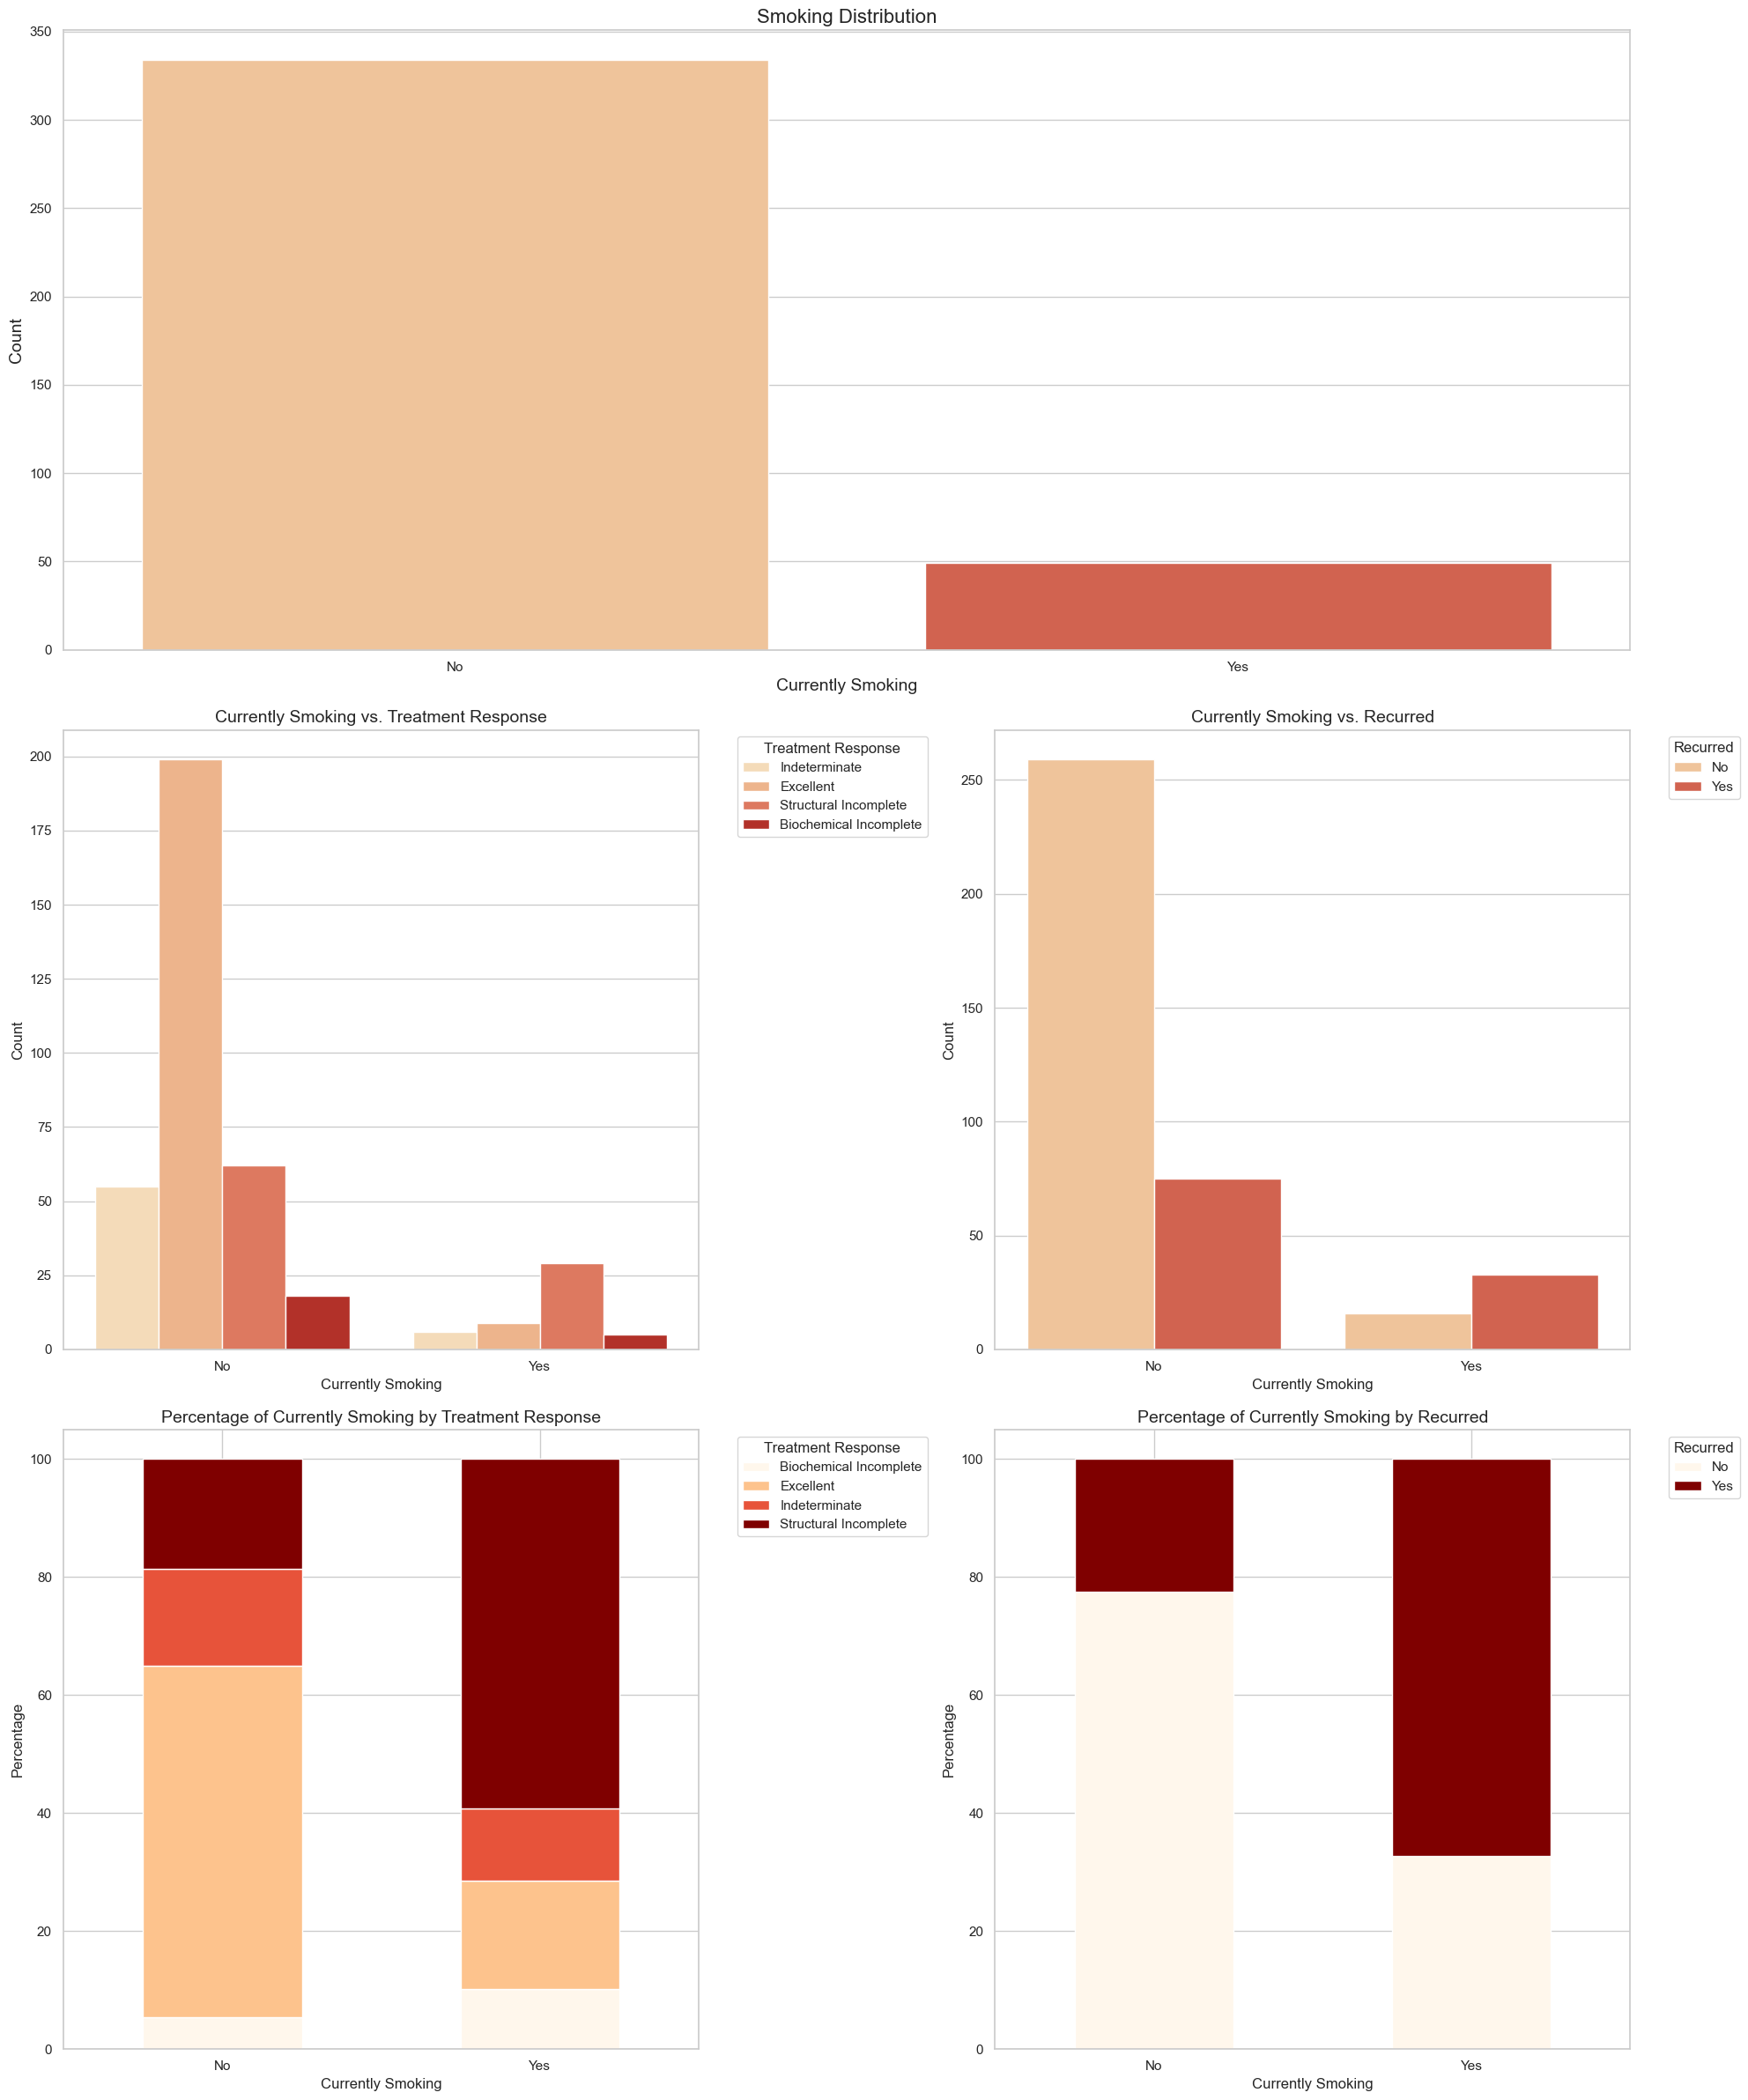

In [297]:
fig = plt.figure(figsize=(20, 24))

# Smoking Distribution (Top Centered, Larger Plot)
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
sb.countplot(x='Currently Smoking', data=thyroiddata, hue='Currently Smoking', palette='OrRd', ax=ax1)
ax1.set_title('Smoking Distribution', fontsize=16)
ax1.set_xlabel('Currently Smoking', fontsize=14)
ax1.set_ylabel('Count', fontsize=14)
ax1.tick_params(axis='x', rotation=0)

# Ensure columns are strings for plotting
thyroiddata["Currently Smoking"] = thyroiddata["Currently Smoking"].astype(str)
thyroiddata["Treatment Response"] = thyroiddata["Treatment Response"].astype(str)

# Calculate the percentage of 'Treatment Response' based on 'Currently Smoking'
treatment_smoking_percentage = thyroiddata.groupby(['Currently Smoking', 'Treatment Response'], observed=False).size().unstack(fill_value=0)
treatment_smoking_percentage = treatment_smoking_percentage.div(treatment_smoking_percentage.sum(axis=1), axis=0) * 100

# Currently Smoking vs. Treatment Response (Bottom Left)
ax2 = plt.subplot2grid((3, 2), (1, 0))
sb.countplot(x="Currently Smoking", hue="Treatment Response", data=thyroiddata, palette="OrRd", ax=ax2)
ax2.set_title("Currently Smoking vs. Treatment Response", fontsize=14)
ax2.set_xlabel("Currently Smoking", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.legend(title="Treatment Response", bbox_to_anchor=(1.05, 1), loc="upper left")
ax2.tick_params(axis='x', rotation=0)

# Currently Smoking vs. Recurred (Bottom Right)
ax3 = plt.subplot2grid((3, 2), (1, 1))
sb.countplot(x="Currently Smoking", hue="Recurred", data=thyroiddata, palette="OrRd", ax=ax3)
ax3.set_title("Currently Smoking vs. Recurred", fontsize=14)
ax3.set_xlabel("Currently Smoking", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)
ax3.legend(title="Recurred", bbox_to_anchor=(1.05, 1), loc="upper left")
ax3.tick_params(axis='x', rotation=0)

# Percentage of Currently Smoking by Treatment Response (Bottom Left)
ax4 = plt.subplot2grid((3, 2), (2, 0))
treatment_smoking_percentage.plot(kind="bar", stacked=True, colormap="OrRd", ax=ax4)
ax4.set_title("Percentage of Currently Smoking by Treatment Response", fontsize=14)
ax4.set_xlabel("Currently Smoking", fontsize=12)
ax4.set_ylabel("Percentage", fontsize=12)
ax4.legend(title="Treatment Response", bbox_to_anchor=(1.05, 1), loc="upper left")
ax4.tick_params(axis='x', rotation=0)

# Calculate the percentage of 'Recurred' based on 'Currently Smoking'
recurred_smoking_percentage = thyroiddata.groupby(['Currently Smoking', 'Recurred'], observed=False).size().unstack(fill_value=0)
recurred_smoking_percentage = recurred_smoking_percentage.div(recurred_smoking_percentage.sum(axis=1), axis=0) * 100

# Percentage of Currently Smoking by Recurred (Bottom Right)
ax5 = plt.subplot2grid((3, 2), (2, 1))
recurred_smoking_percentage.plot(kind="bar", stacked=True, colormap="OrRd", ax=ax5)
ax5.set_title("Percentage of Currently Smoking by Recurred", fontsize=14)
ax5.set_xlabel("Currently Smoking", fontsize=12)
ax5.set_ylabel("Percentage", fontsize=12)
ax5.legend(title="Recurred", bbox_to_anchor=(1.05, 1), loc="upper left")
ax5.tick_params(axis='x', rotation=0)

# Add spacing between subplots for better readability
plt.tight_layout()
plt.show()

From the above plots, we observe that:

1. Majority of Thyroid Cancer patients do not smoke.

2. Smoking __reduces the effectiveness of the initial thyroid cancer treatment__.
__Without smoking__, the percentage of patients experiencing __excellence in treatment response__ is __65%__, with __more than 75% not experiencing a recurrence__ of the cancer.
- However, a __much smaller proportion__ of about __17%__ of patients who are __currently smoking__ experiences excellence in initial treatment response, with about __60%__ experiencing __structural incomplete (cancer was not fully eradicated)__ ,as compared to the 20% of patients who are currently not smoking but experiences structural incomplete. 

3. Smoking __increases the likelihood of Thyroid Cancer Recurrence__.
- About __67%__ of __patients who are smoking__ experiences a __recurrence of the thyroid cancer__, which is significantly higher than the __< 25%__ of patients who aren't smoking that experiences it as well.
- This suggests that __smoking severely affects cancer treatment measures in reducing the likelihood of recurrence in the cancer, and therefore recovery__.

### Hence, these suggests that while smoking may not be a direct factor that causes thyroid cancer, it severely __diminishes__ the success of treatment outcomes and possibly __increases__ the likelihood of recurrence.

## 2. How Adenopathy and Tumor (type) affects patients with Thyroid Cancer

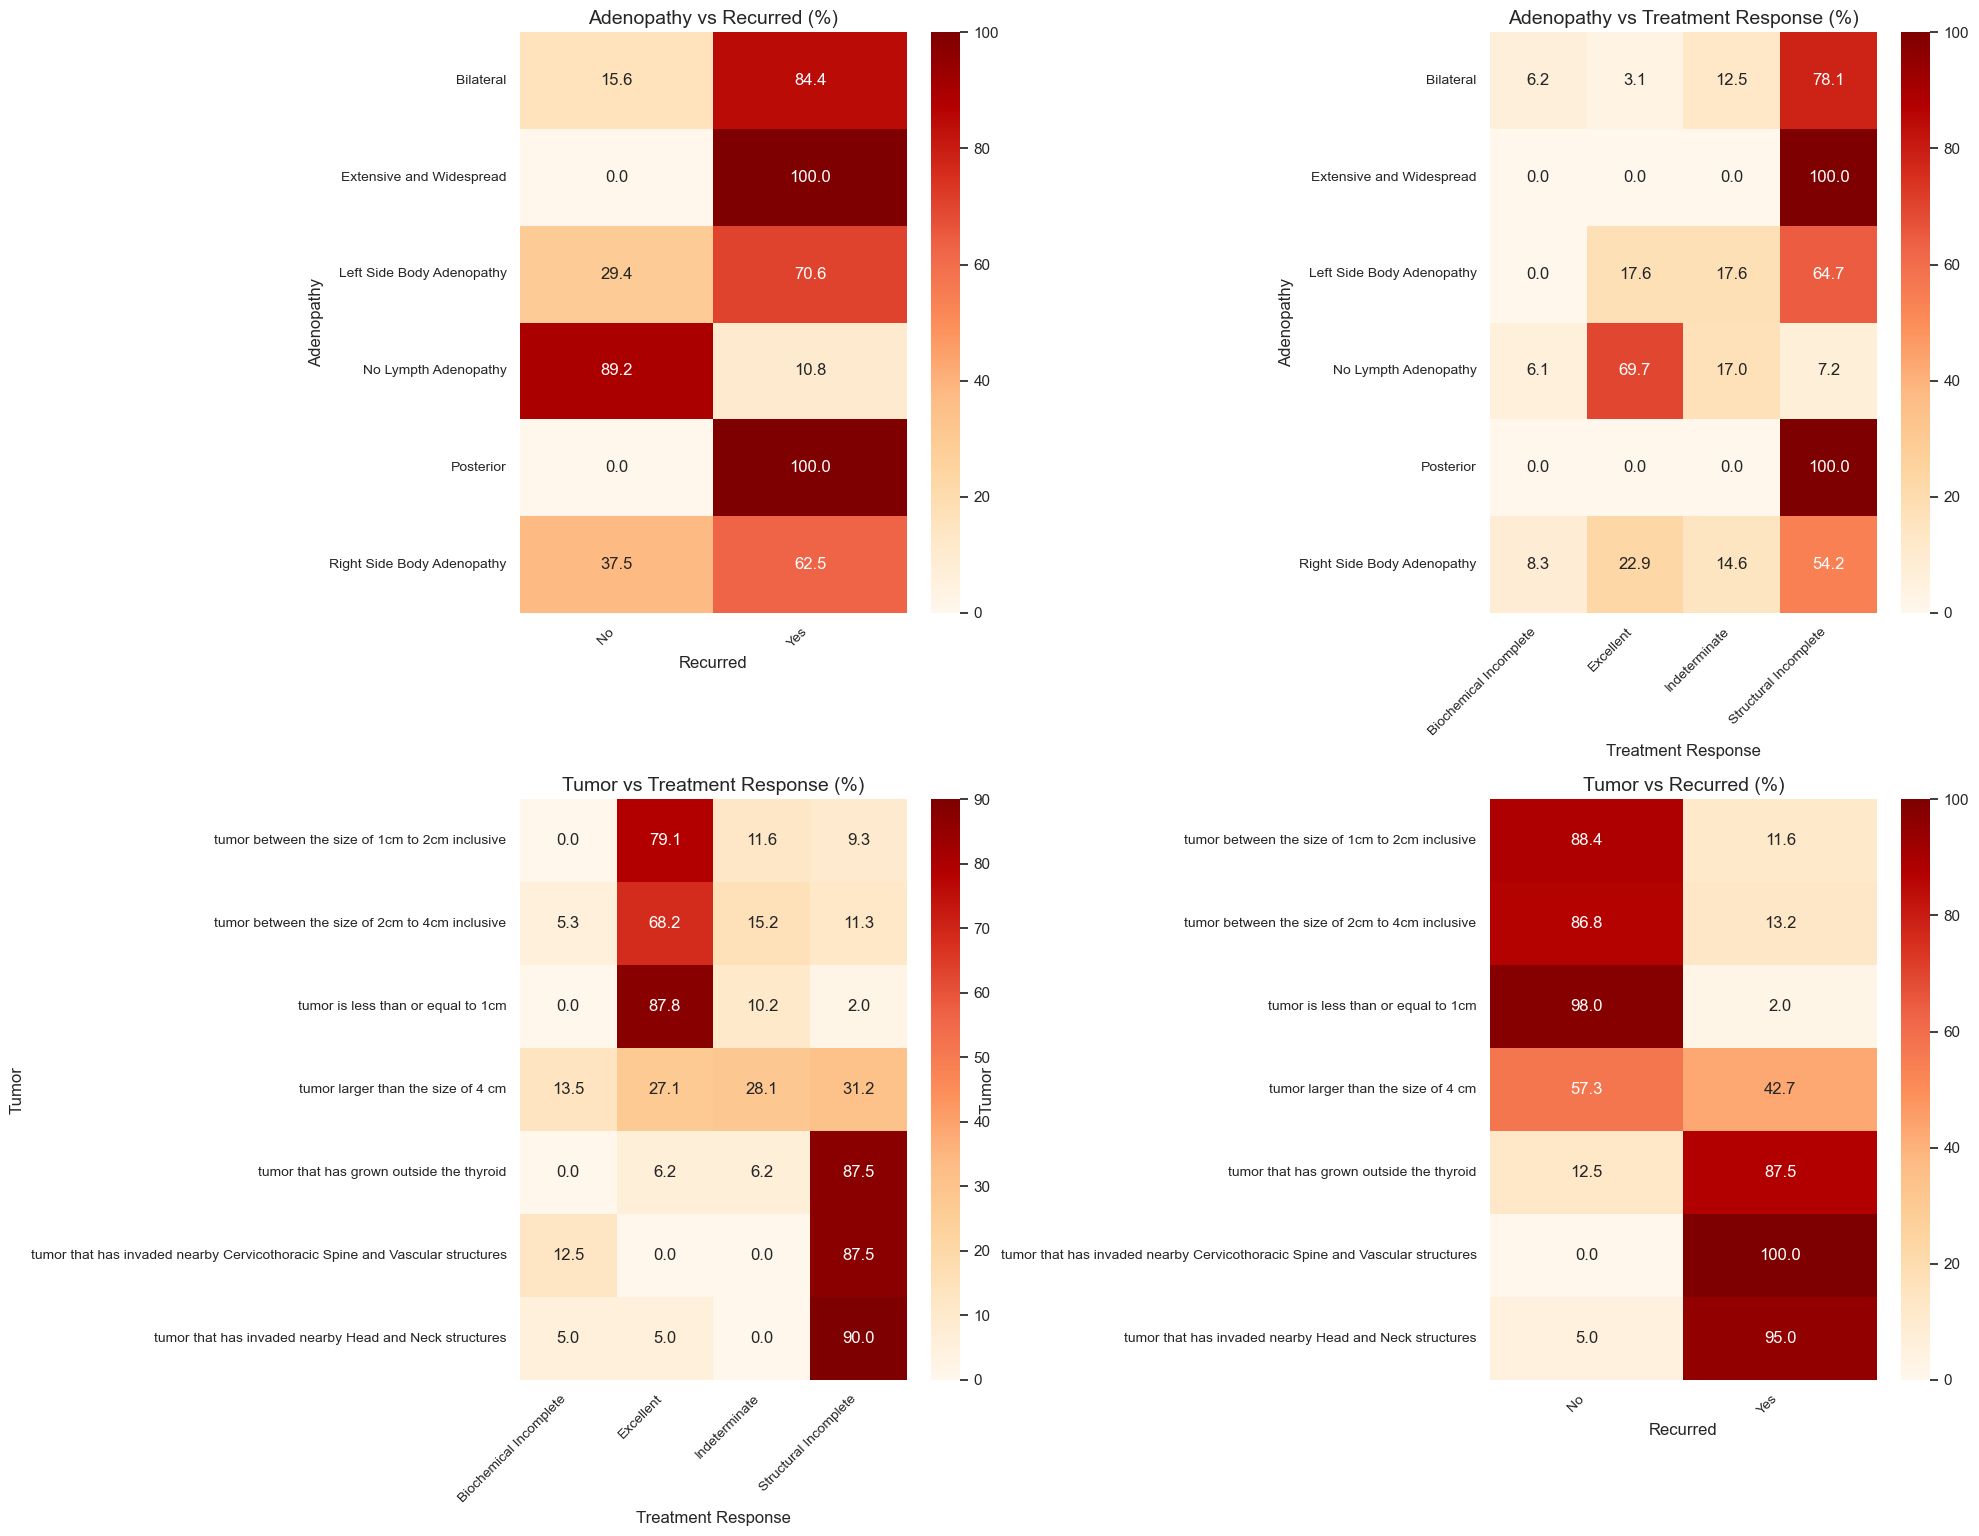

In [300]:
# Ensure necessary columns exist and are strings
columns_to_string = ["Adenopathy", "Recurred", "Treatment Response", "Tumor"]
if all(col in thyroiddata.columns for col in columns_to_string):
    thyroiddata[columns_to_string] = thyroiddata[columns_to_string].astype(str)
else:
    missing_cols = [col for col in columns_to_string if col not in thyroiddata.columns]
    raise KeyError(f"Missing columns in thyroiddata: {missing_cols}")

# Set up the plot canvas
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
plt.subplots_adjust(hspace=0.5, wspace=0.4)

# 1. Adenopathy vs Recurred (Heatmap)
cross_tab_adenopathy_recurred = pd.crosstab(thyroiddata["Adenopathy"], thyroiddata["Recurred"], normalize='index') * 100
sb.heatmap(cross_tab_adenopathy_recurred, annot=True, cmap="OrRd", fmt=".1f", ax=axes[0, 0])
axes[0, 0].set_title("Adenopathy vs Recurred (%)", fontsize=14)
axes[0, 0].set_xlabel("Recurred", fontsize=12)
axes[0, 0].set_ylabel("Adenopathy", fontsize=12)
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)
axes[0, 0].set_yticklabels(axes[0, 0].get_yticklabels(), rotation=0, fontsize=10)

# 2. Adenopathy vs Treatment Response (Heatmap)
cross_tab_adenopathy_response = pd.crosstab(thyroiddata["Adenopathy"], thyroiddata["Treatment Response"], normalize='index') * 100
sb.heatmap(cross_tab_adenopathy_response, annot=True, cmap="OrRd", fmt=".1f", ax=axes[0, 1])
axes[0, 1].set_title("Adenopathy vs Treatment Response (%)", fontsize=14)
axes[0, 1].set_xlabel("Treatment Response", fontsize=12)
axes[0, 1].set_ylabel("Adenopathy", fontsize=12)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45, ha="right", fontsize=10)
axes[0, 1].set_yticklabels(axes[0, 1].get_yticklabels(), rotation=0, fontsize=10)

# 3. Tumor vs Recurred (Heatmap)
cross_tab_tumor_recurred = pd.crosstab(thyroiddata["Tumor"], thyroiddata["Recurred"], normalize='index') * 100
sb.heatmap(cross_tab_tumor_recurred, annot=True, cmap="OrRd", fmt=".1f", ax=axes[1, 1])
axes[1, 1].set_title("Tumor vs Recurred (%)", fontsize=14)
axes[1, 1].set_xlabel("Recurred", fontsize=12)
axes[1, 1].set_ylabel("Tumor", fontsize=12)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha="right", fontsize=10)
axes[1, 1].set_yticklabels(axes[1, 1].get_yticklabels(), rotation=0, fontsize=10)

# 4. Tumor vs Treatment Response (Heatmap)
cross_tab_tumor_response = pd.crosstab(thyroiddata["Tumor"], thyroiddata["Treatment Response"], normalize='index') * 100
sb.heatmap(cross_tab_tumor_response, annot=True, cmap="OrRd", fmt=".1f", ax=axes[1, 0])
axes[1, 0].set_title("Tumor vs Treatment Response (%)", fontsize=14)
axes[1, 0].set_xlabel("Treatment Response", fontsize=12)
axes[1, 0].set_ylabel("Tumor", fontsize=12)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45, ha="right", fontsize=10)
axes[1, 0].set_yticklabels(axes[1, 0].get_yticklabels(), rotation=0, fontsize=10)

# Adjust layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


From the above plots, we observe that:

In __Adenopathy__ reports,
Patients with any form of swollen lymph nodes have a higher likelihood of experiencing recurrence and poorer initial treatment response in Thyroid Cancer.
- __89.2%__ of Patients with __"No lymph Adenopathy"__ experiences __no recurrence in thyroid cancer__, and __69.7%__ experiences Excellent initial Treatment Response, suggesting an overall increased likelihood of recovery.
- Patients with __"Extensive and Widespread" and " Posterior"__ swollen lymph nodes had a __100% recurrence rate AND Structural Incomplete Treatment Response__, which suggests that these are the __most severe__ cases that are __hardest to treat completely__.
- __84.4%, 70.6%, 62.5%__ of patients with __"Bilateral", "Left Side Body Adenopathy", "Right Side Body Adenopathy"__ experiences __recurrence__ in Thyroid Cancer respectively, while __78.1%, 64.7%, 54.2%__ of patients with __"Bilateral", "Left Side Body Adenopathy", "Right Side Body Adenopathy"__ experiences __Structural Incomplete Treatment Response__, suggesting that their presence still cause cases to be __more serious__ and __harder to treat completely__.

In __Tumor (type)__ reports,
Patients with tumors that have grown beyond the thyroids or into other body areas will have the lowest chance of recovery.
- Patients with tumor sizes __less than 2cm__ have extremely good chances of experiencing __Excellent initial Treatment Response__ and __no recurrence__ in Thyroid Cancer.
- __90%, 87.5% and 87.5%__ of patients with __tumors that have grown outside the thyroid, invaded nearby Cervicothoracic Spine and Vascular structures, and invaded nearby Head and Neck structures__ respectively experiences __Structural incomplete Treatment Response__, which suggest that they are the __most severe__ extent of tumor that are likely to cause complications __hardest to treat completely__.
- __100%__ of patients with __tumor that has invaded nearby Cervicothoracic Spine and Vascular structures__ experiences __recurrence__ in Thyroid Cancer, suggesting that they are extreme cases that will definitely cause recurrence.
- __95% and 87.5%__ of patients with __tumor that has "invaded nearby Head and Neck structures" and "grown outside the thyroid"__ respectively experiences __recurrence__ in Thyroid Cancer, which suggests that they are __more severe__ cases that are __harder to treat completely__.

### Hence, these suggests that the __presence__ and __extensiveness__ of __Adenopathy and Tumors__ in patients will determine the __effectiveness of initial Treatment Outcome__ and __likelihood of recurrence__.


## 3. How Age affects Patients with Thyroid Cancer

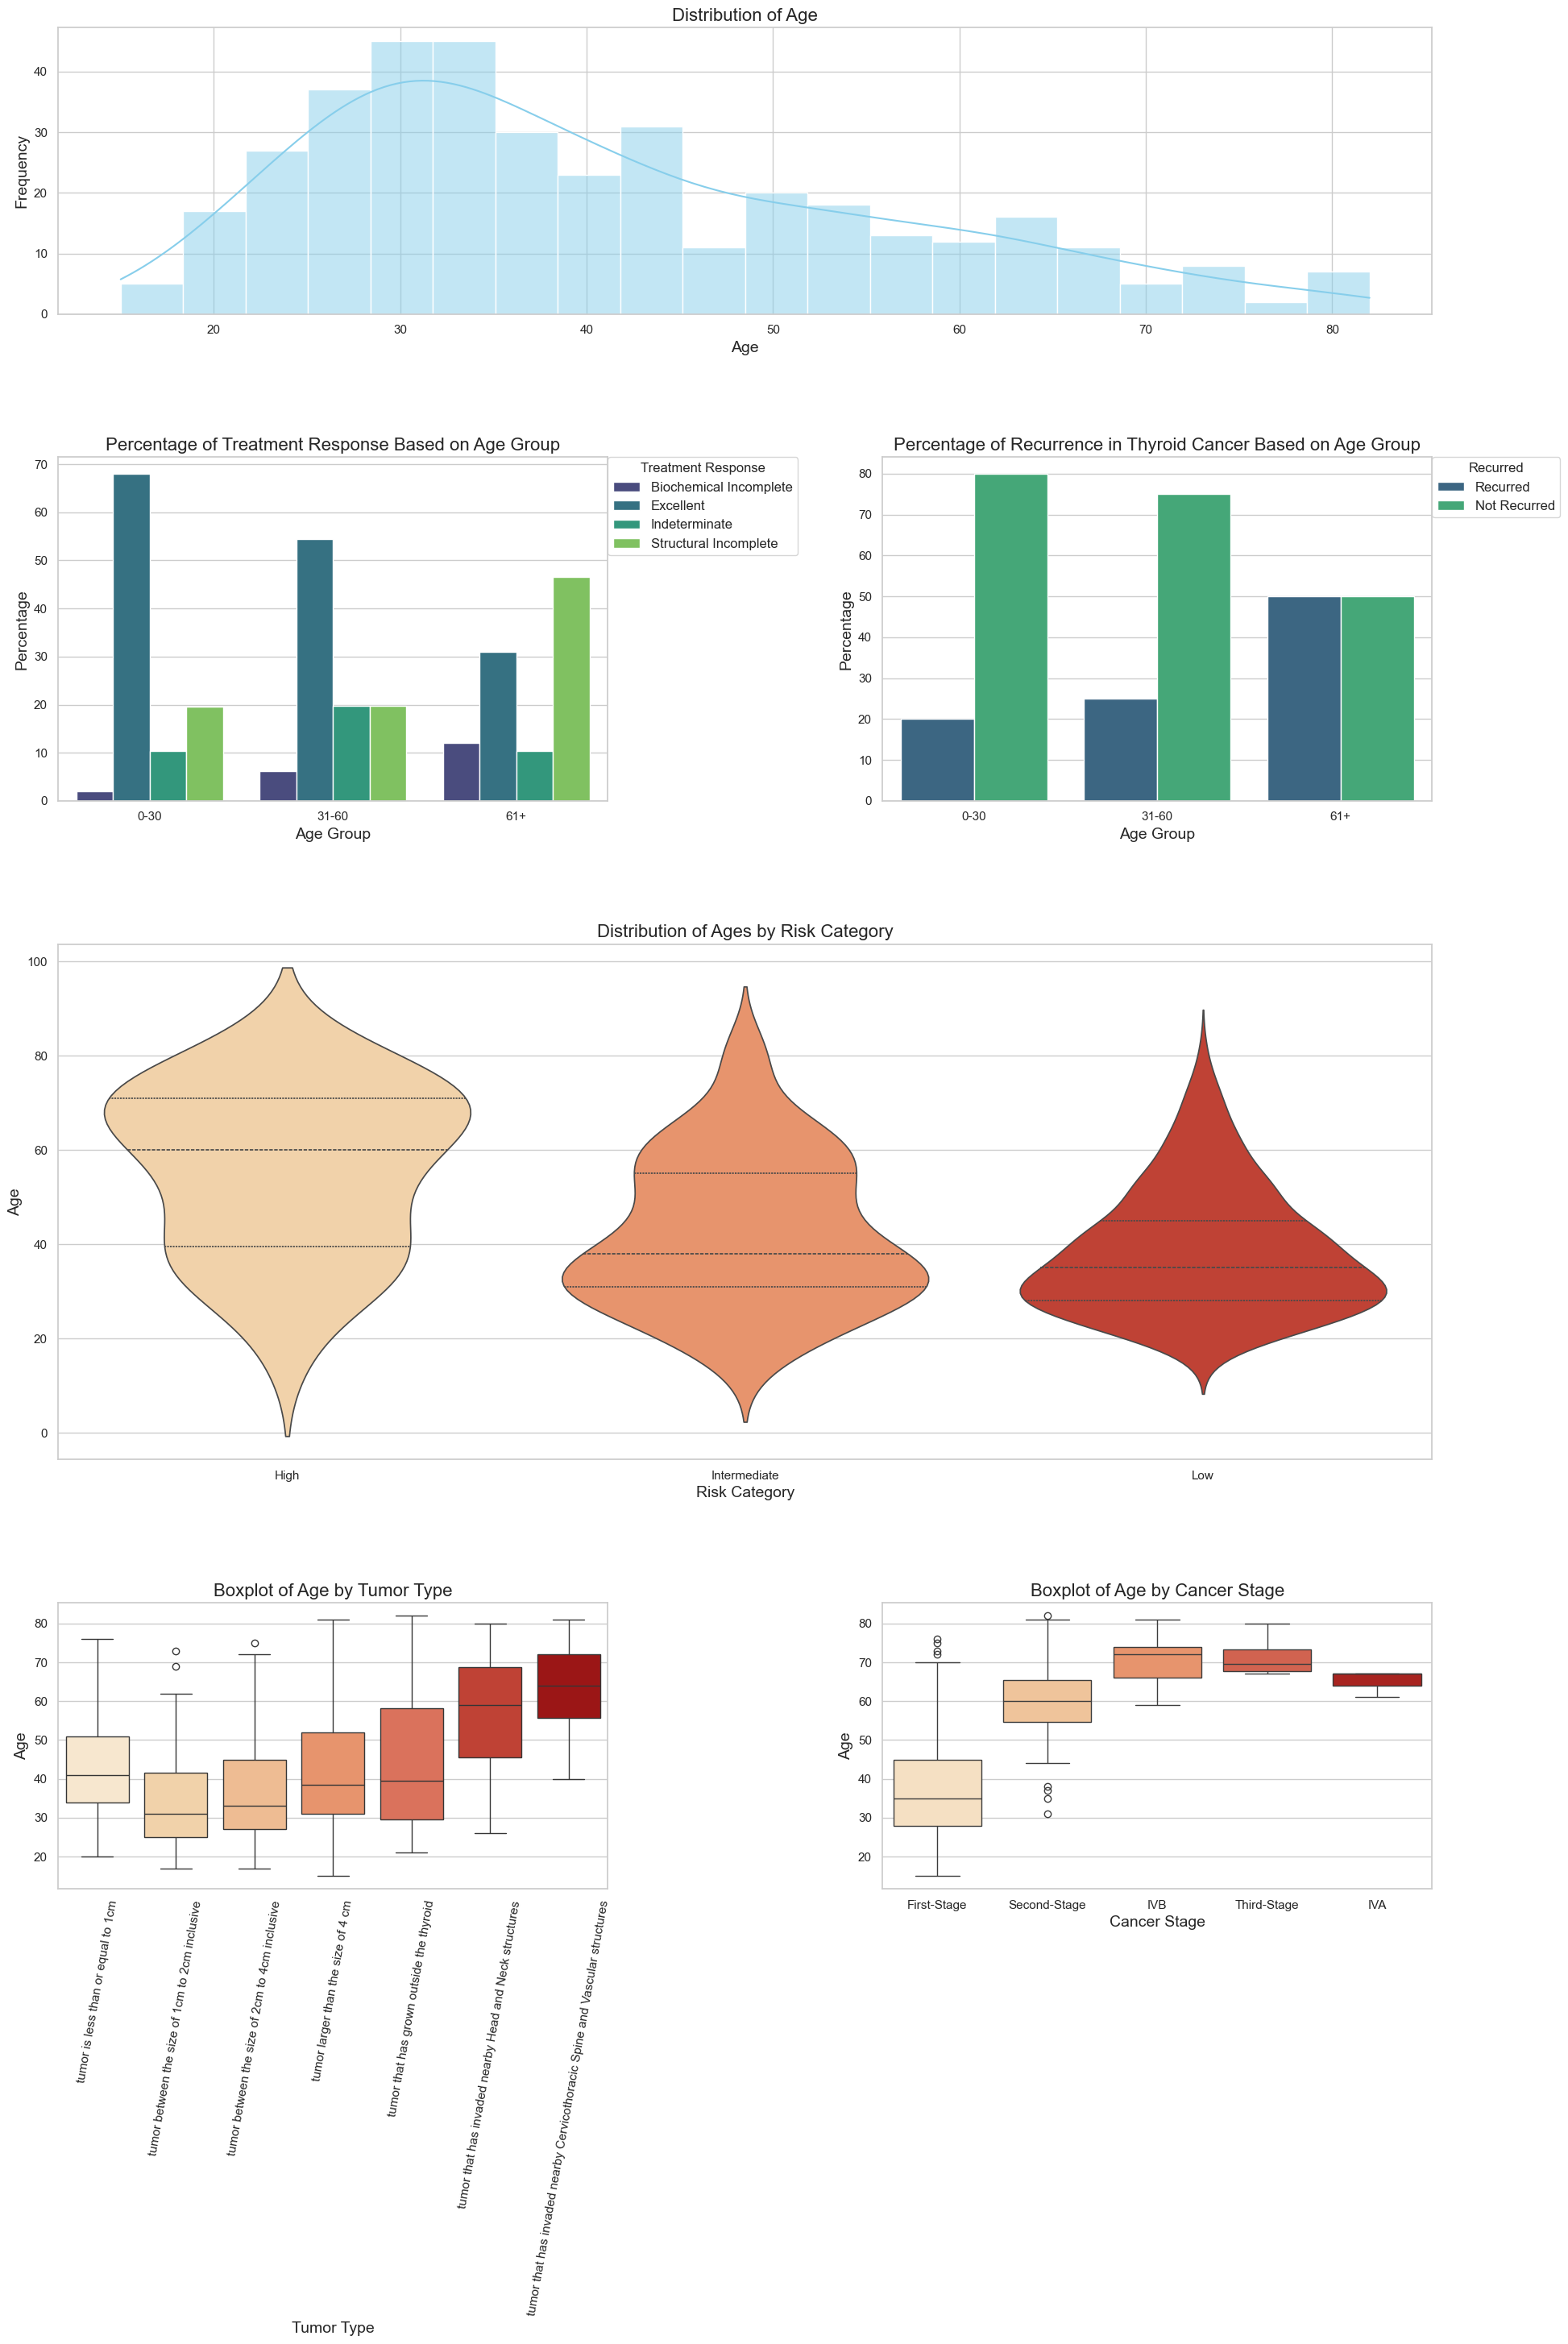

In [303]:
# Raw treatment response data by age group
age_group_treatment_percentage = pd.DataFrame({
    'Age Group': ['0-30', '31-60', '61+'],
    'Biochemical Incomplete': [2.06, 6.14, 12.07],
    'Excellent': [68.04, 54.39, 31.03],
    'Indeterminate': [10.31, 19.74, 10.34],
    'Structural Incomplete': [19.59, 19.74, 46.55]
})

# Melt the DataFrame for seaborn plotting
age_group_treatment_percentage_melted = pd.melt(
    age_group_treatment_percentage,
    id_vars='Age Group',
    var_name='Treatment Response',
    value_name='Percentage'
)

#Recurrence data by age group
age_group_recurred_percentage = pd.DataFrame({
    'Age Group': ['0-30', '31-60', '61+'],
    'Recurred': [20.0, 25.0, 50.0],
    'Not Recurred': [80.0, 75.0, 50.0]
})


fig = plt.figure(figsize=(22, 30))  

# Use fig.add_gridspec() for better spacing control
gs = fig.add_gridspec(4, 2, height_ratios=[1, 1.2, 1.8, 1], hspace=0.4, wspace=0.5)

# Top graph (Distribution of 'Age')
ax1 = fig.add_subplot(gs[0, :])
sb.histplot(thyroiddata['Age'], bins=20, kde=True, color='skyblue', ax=ax1)
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.set_title('Distribution of Age', fontsize=16)

# Bottom left graph (Percentage of 'Treatment Response' based on 'Age Group')
ax2 = fig.add_subplot(gs[1, 0])
sb.barplot(data=age_group_treatment_percentage_melted, x='Age Group', y='Percentage', hue='Treatment Response', palette='viridis', ax=ax2)
ax2.set_xlabel('Age Group', fontsize=14)
ax2.set_ylabel('Percentage', fontsize=14)
ax2.set_title('Percentage of Treatment Response Based on Age Group', fontsize=16)

# Move legend to the right outside the plot
ax2.legend(title='Treatment Response', bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, fontsize=12)

# Prepare the melted data for 'age_group_recurred_percentage'
age_group_recurred_percentage_melted = pd.melt(age_group_recurred_percentage, id_vars=['Age Group'], 
                                               value_vars=['Recurred', 'Not Recurred'], 
                                               var_name='Recurred', value_name='Percentage')

# Bottom right graph (Percentage of 'Recurred' based on 'Age Group')
ax3 = fig.add_subplot(gs[1, 1])
sb.barplot(data=age_group_recurred_percentage_melted, x='Age Group', y='Percentage', hue='Recurred', palette='viridis', ax=ax3)
ax3.set_xlabel('Age Group', fontsize=14)
ax3.set_ylabel('Percentage', fontsize=14)
ax3.set_title('Percentage of Recurrence in Thyroid Cancer Based on Age Group', fontsize=16)
ax3.legend(title='Recurred', bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, fontsize=12)

# Bottom row graph (Distribution of Ages by Risk Category)
ax4 = fig.add_subplot(gs[2, :])

# Risk column
if 'Risk' in thyroiddata.columns:
    thyroiddata['Risk'] = pd.Categorical(thyroiddata['Risk'])  # Ensure categorical data
    order = sorted(thyroiddata['Risk'].unique())  # Sort categories
    
    sb.violinplot(x='Risk', y='Age', data=thyroiddata, hue='Risk', palette='OrRd', inner='quartile', order=order, ax=ax4)
    ax4.set_title('Distribution of Ages by Risk Category', fontsize=16)
    ax4.set_xlabel('Risk Category', fontsize=14)
    ax4.set_ylabel('Age', fontsize=14)
else:
    print("Warning: 'Risk' column not found in thyroiddata")

# Bottom row for boxplots
ax5 = fig.add_subplot(gs[3, 0])
sb.boxplot(x='Tumor', y='Age', data=thyroiddata, hue='Tumor', palette="OrRd", ax=ax5)
ax5.set_title('Boxplot of Age by Tumor Type', fontsize=16)
ax5.set_xlabel('Tumor Type', fontsize=14)
ax5.set_ylabel('Age', fontsize=14)
ax5.tick_params(axis='x', rotation=80)

ax6 = fig.add_subplot(gs[3, 1])
sb.boxplot(x='Stage', y='Age', data=thyroiddata, hue='Stage', palette="OrRd", ax=ax6)
ax6.set_title('Boxplot of Age by Cancer Stage', fontsize=16)
ax6.set_xlabel('Cancer Stage', fontsize=14)
ax6.set_ylabel('Age', fontsize=14)
ax6.tick_params(axis='x', rotation=0)

plt.show()

From the above plots, we observe that:
1. Thyroid Cancer is __most prominent__ in patients between the ages of __25 to 35 years old__. 

2. After treatement, there's a __decline in excellence post-treatment__. 
- While __over 65%__ of those __aged less than or equal to 30 years old__ experiences excellence after treatment, only about __55% of those between 31-60 years old__ experiences this, and only __31%__, a __significantly smaller__ proportion of patients __aged 61 and above__ ,enjoys this outcome. 

3. __Likelihood__ for patients to experience structural incomplete (cancer was not fully eradicated) over excellence __increases with age__. 
- About __68 - 19 = 49%__ more Patients aged __less than or equal to 30 years old__ are likely to experience excellence over structural incomplete, while about __55 - 20 = 35%__ more patients aged __between 31-60 years old__ are likely to experience excellence over structural incomplete, __BUT about 46 - 31 = 15%__ more patients aged above 60 are likely to experience __structural incomplete OVER excellence__.

4. Likelihood of Thyroid Cancer __recurrence increases with age__.
- While only __20%__ of patients aged __at most 30 years old__ will suffer a recurrence of the thyroid cancer, __25%__ of patients aged __between 31-60 years old__, a 5% increase, will suffer from recurrence, __BUT__ a staggering __50%__ of patients aged __above 60__ suffers from recurrence of the cancer. 

5. Patients aged between 60-80 years old are at the highest risk of experiencing an aggresive form of thyroid cancer.
- At high risk, peaks are most prominent around the age between 60-80 years old, while low and intermediate risks have peaks for patients around the age of 30 years old.

6. There is an overall __increasing trend__ for the __severity of tumor stages__ and __cancer stages respectively based on age__, suggesting that the __severity of thyroid cancer affects patients increases with age__.

 ### Hence, these show that it becomes __less likely__ for patients to make a full recovery from thyroid cancer __as they age__.

## 4. How Gender affects Patients with Thyroid Cancer

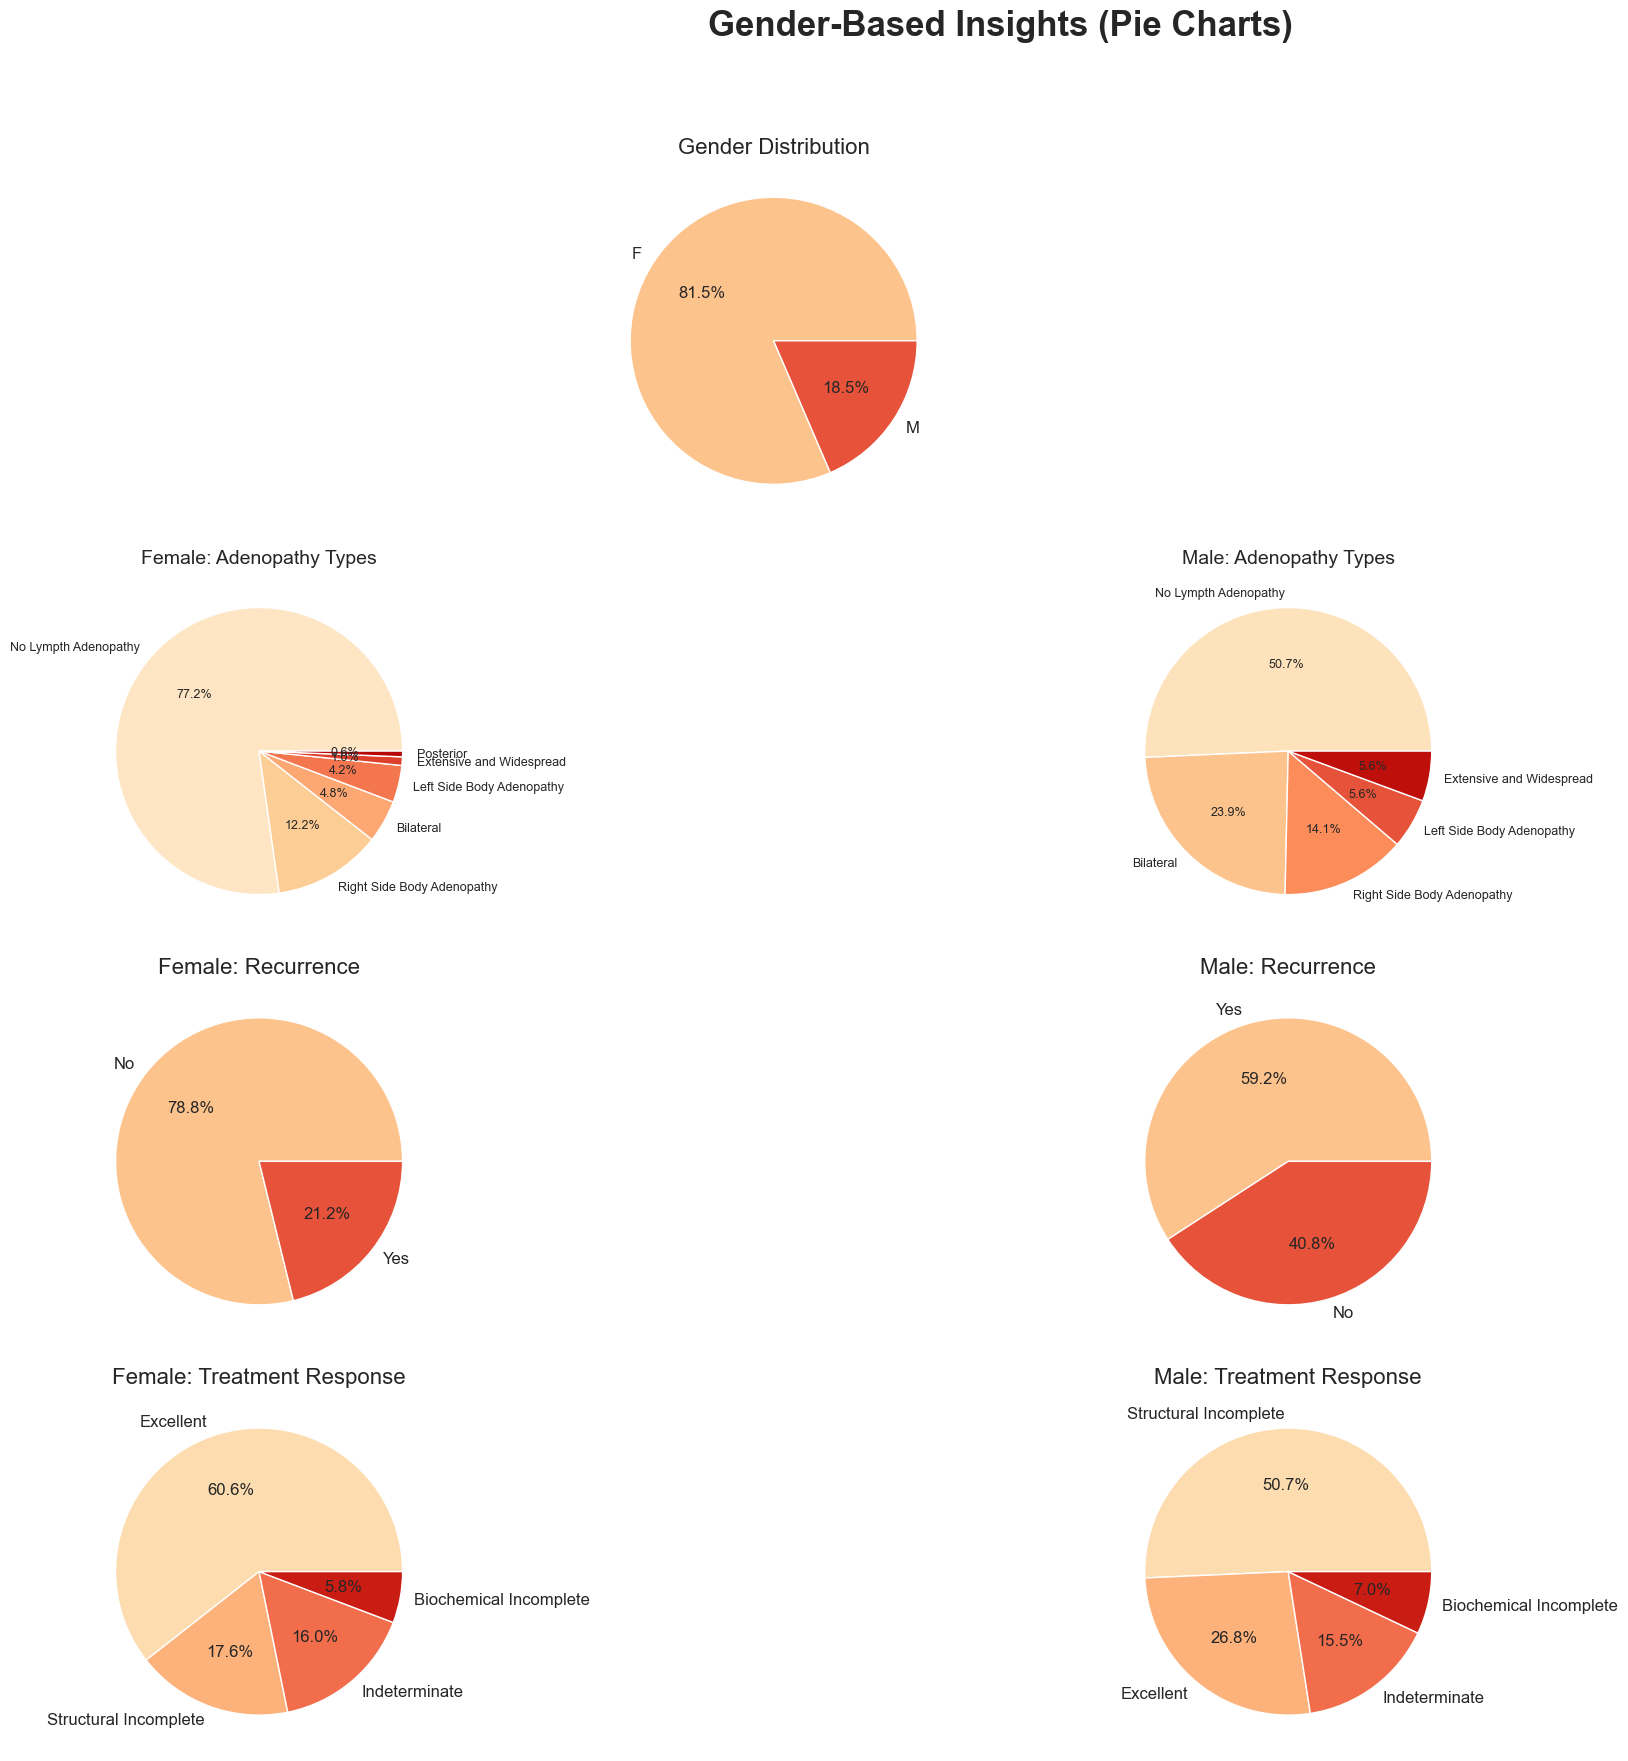

In [306]:
# Ensure columns are strings
thyroiddata["Gender"] = thyroiddata["Gender"].astype(str)
thyroiddata["Recurred"] = thyroiddata["Recurred"].astype(str)
thyroiddata["Treatment Response"] = thyroiddata["Treatment Response"].astype(str)
thyroiddata["Adenopathy"] = thyroiddata["Adenopathy"].astype(str)

# Set style
sb.set(style="whitegrid", palette="OrRd")
fig = plt.figure(figsize=(20, 18))  
fig.suptitle("Gender-Based Insights (Pie Charts)", fontsize=25, fontweight='bold')

# Row 1: Gender Distribution and Gender vs Adenopathy
ax1 = plt.subplot2grid((4, 4), (0, 1), colspan=1)
gender_counts = thyroiddata["Gender"].value_counts()
ax1.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
        colors=sb.color_palette("OrRd", len(gender_counts)), textprops={'fontsize': 12})
ax1.set_title("Gender Distribution", fontsize=16)

ax2 = plt.subplot2grid((4, 4), (1, 0))
female_adenopathy = thyroiddata[thyroiddata["Gender"] == "F"]["Adenopathy"].value_counts()
ax2.pie(female_adenopathy, labels=female_adenopathy.index, autopct='%1.1f%%',
        colors=sb.color_palette("OrRd", len(female_adenopathy)), textprops={'fontsize': 9})
ax2.set_title("Female: Adenopathy Types", fontsize=14)

ax3 = plt.subplot2grid((4, 4), (1, 2))
male_adenopathy = thyroiddata[thyroiddata["Gender"] == "M"]["Adenopathy"].value_counts()
ax3.pie(male_adenopathy, labels=male_adenopathy.index, autopct='%1.1f%%',
        colors=sb.color_palette("OrRd", len(male_adenopathy)), textprops={'fontsize': 9})
ax3.set_title("Male: Adenopathy Types", fontsize=14)

# Female vs Male Recurrence
ax4 = plt.subplot2grid((4, 4), (2, 0))
female_recurred_counts = thyroiddata[thyroiddata["Gender"] == "F"]["Recurred"].value_counts()
ax4.pie(female_recurred_counts, labels=female_recurred_counts.index, autopct='%1.1f%%',
        colors=sb.color_palette("OrRd", len(female_recurred_counts)), textprops={'fontsize': 12})
ax4.set_title("Female: Recurrence", fontsize=16)

ax5 = plt.subplot2grid((4, 4), (2, 2))
male_recurred_counts = thyroiddata[thyroiddata["Gender"] == "M"]["Recurred"].value_counts()
ax5.pie(male_recurred_counts, labels=male_recurred_counts.index, autopct='%1.1f%%',
        colors=sb.color_palette("OrRd", len(male_recurred_counts)), textprops={'fontsize': 12})
ax5.set_title("Male: Recurrence", fontsize=16)

# Row 3: Female vs Male Treatment Response
ax6 = plt.subplot2grid((4, 4), (3, 0))
female_treat_counts = thyroiddata[thyroiddata["Gender"] == "F"]["Treatment Response"].value_counts()
ax6.pie(female_treat_counts, labels=female_treat_counts.index, autopct='%1.1f%%',
        colors=sb.color_palette("OrRd", len(female_treat_counts)), textprops={'fontsize': 12})
ax6.set_title("Female: Treatment Response", fontsize=16)

ax7 = plt.subplot2grid((4, 4), (3, 2))
male_treat_counts = thyroiddata[thyroiddata["Gender"] == "M"]["Treatment Response"].value_counts()
ax7.pie(male_treat_counts, labels=male_treat_counts.index, autopct='%1.1f%%',
        colors=sb.color_palette("OrRd", len(male_treat_counts)), textprops={'fontsize': 12})
ax7.set_title("Male: Treatment Response", fontsize=16)

# Adjust layout for spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



From the above plots, we observe that:

1. There are significantly __more Female(81.5%)__ patients than __Male(18.5%) patients__.

2. Larger proportion of Male patients may present with __more aggressive lymph node involvement__, despite being fewer in number.
- __Most Female patients(77.2%) experiences No Lymph Adenopathy__ over male patients(50.7%), possibly indicating earlier detection or a lower likelihood of lymphatic spread.
- __23.9%__ and __5.6%__ of male patients have __"Bilateral"__ or __"Extensive and Widespread"__ types of Adenopathy, which as determined earlier, are the most severe Adenopathy that is hardest to treat completely and highly likely of recurrence. Compared to the __4.8%__ and __1%__ respectively for female patients, this suggests that a larger proportion of males will experience __more aggressive or advanced cases__ of thyroid cancer.

3. __Larger percentage of Female patients(78.8%)__ will experience a __recurrence__ of the thyroid cancer, as compared to male patients(59.2%).

4. __Female patients(60.6%)__ have higher likelihood of experiencing __Excellent treatment response__ as compared to male patients(50.7%). 
- This suggests that __male patients__ have a __higher likelihood__ of experiencing __further complications__ during or after undergoing cancer treatments.

### These insights suggests that while __more females__ are likely to __contract Thyroid Cancer__, __Male patients__ are more likely to experience severe complications that __increases likelihood of recurrence and poorer treatment response__.

# Machine Learning

From the EDA above, we can conclude the following:
- Age is big indicator, hence should definitely be included in predictor features
- Smoking makes the recurrence chance at least 2.5 times higher
- Having adenopathy increases the recurrence chance
- Males are 5 times more likely to get sick again than females


## Data Preparation

__This part consists of 2 sections:__
1. Encoding categorical values - It makes the dataset compatible with our models.
2. Splitting Train and Test data sets with various predictor variables.

### 1. Encoding categorical variables into numerical values

Here, we will be creating another dataframe "thyroiddata_filtered" and encode the categorical variables so that our machine learning models will have no issue handling it.

In [312]:
import os
os.environ["OMP_NUM_THREADS"] = "2"
relevant_columns = [
    "Age", "Gender", "Currently Smoking", "Smoking History", "Radiotherapy History",
    "Adenopathy", "Focality", "Risk", "Tumor", "Lymph Nodes", "Cancer Metastasis", "Recurred"
]

thyroiddata_filtered = thyroiddata.copy()

#### Our Current data:

In [314]:
thyroiddata_filtered.head()

,Age,Gender,Currently Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor is less than or equal to 1cm,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor is less than or equal to 1cm,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor is less than or equal to 1cm,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No Lympth Adenopathy,Micropapillary,Uni-Focal,Low,tumor is less than or equal to 1cm,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No Lympth Adenopathy,Micropapillary,Multi-Focal,Low,tumor is less than or equal to 1cm,no evidence of regional lymph node metastasis,no evidence of distant metastasis,First-Stage,Excellent,No


### Here, we will be identifying different variables in each of the columns that will be later used as a predictor variables.

In [316]:
columns_to_check = ["Gender", "Currently Smoking", "Smoking History", "Radiotherapy History", "Thyroid Function", "Physical Examination", "Adenopathy", 
                    "Types of Thyroid Cancer (Pathology)", "Focality", "Risk", "Tumor", 
                    "Lymph Nodes", "Cancer Metastasis", "Stage", "Treatment Response"]

for col in columns_to_check:
    unique_values = []
    for value in thyroiddata_filtered[col]:
        if value not in unique_values:
            unique_values.append(value)
    print(f"Number of distinct variables in '{col}':", len(unique_values))
    print("Variables include:", unique_values)
    print()  # Adds a blank line between outputs


Number of distinct variables in 'Gender': 2
Variables include: ['F', 'M']

Number of distinct variables in 'Currently Smoking': 2
Variables include: ['No', 'Yes']

Number of distinct variables in 'Smoking History': 2
Variables include: ['No', 'Yes']

Number of distinct variables in 'Radiotherapy History': 2
Variables include: ['No', 'Yes']

Number of distinct variables in 'Thyroid Function': 5
Variables include: ['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism', 'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism']

Number of distinct variables in 'Physical Examination': 5
Variables include: ['Single nodular goiter-left', 'Multinodular goiter', 'Single nodular goiter-right', 'Normal', 'Diffuse goiter']

Number of distinct variables in 'Adenopathy': 6
Variables include: ['No Lympth Adenopathy', 'Right Side Body Adenopathy', 'Extensive and Widespread', 'Left Side Body Adenopathy', 'Bilateral', 'Posterior']

Number of distinct variables in 'Types of Thyroid Cancer

In [317]:
# Encode categorical variables
# For example, Gender: F -> 0, M -> 1
thyroiddata_filtered["Gender"] = thyroiddata["Gender"].map({"F": 0, "M": 1})
thyroiddata_filtered["Currently Smoking"] = thyroiddata["Currently Smoking"].map({"No": 0, "Yes": 1})
thyroiddata_filtered["Smoking History"] = thyroiddata["Smoking History"].map({"No": 0, "Yes": 1})
thyroiddata_filtered["Adenopathy"] = thyroiddata["Adenopathy"].map({"No Lympth Adenopathy": 0, "Right Side Body Adenopathy": 1, "Extensive and Widespread": 2, "Left Side Body Adenopathy": 3, "Bilateral": 4, "Posterior": 5})
thyroiddata_filtered["Radiotherapy History"] = thyroiddata["Radiotherapy History"].map({"No": 0, "Yes": 1}) 
thyroiddata_filtered["Focality"] = thyroiddata["Focality"].map({"Uni-Focal": 0, "Multi-Focal": 1}) 
thyroiddata_filtered["Risk"] = thyroiddata["Risk"].map({"Low": 0, "Intermediate": 1, "High": 2}) 
thyroiddata_filtered["Tumor"] = thyroiddata["Tumor"].map({'tumor is less than or equal to 1cm': 0, 
                                                          'tumor between the size of 1cm to 2cm inclusive': 1, 
                                                          'tumor between the size of 2cm to 4cm inclusive': 2, 
                                                          'tumor larger than the size of 4 cm': 3, 
                                                          'tumor that has grown outside the thyroid': 4, 
                                                          'tumor that has invaded nearby Head and Neck structures': 5,
                                                          'tumor that has invaded nearby Cervicothoracic Spine and Vascular structures': 6})

thyroiddata_filtered["Cancer Metastasis"] = thyroiddata["Cancer Metastasis"].map({"no evidence of distant metastasis": 0, "presence of distant metastasis": 1}) 

thyroiddata_filtered["Lymph Nodes"] = thyroiddata["Lymph Nodes"].map({"no evidence of regional lymph node metastasis": 0,
                                                                      'regional lymph node metastasis in the central of the neck': 1,
                                                                      'regional lymph node metastasis in the lateral of the neck': 2})

# Encode remaining categorical variables

# Thyroid Function
thyroiddata_filtered["Thyroid Function"] = thyroiddata["Thyroid Function"].map({
    "Euthyroid": 0,
    "Clinical Hyperthyroidism": 1,
    "Clinical Hypothyroidism": 2,
    "Subclinical Hyperthyroidism": 3,
    "Subclinical Hypothyroidism": 4
})

# Physical Examination
thyroiddata_filtered["Physical Examination"] = thyroiddata["Physical Examination"].map({
    "Normal": 0,
    "Single nodular goiter-left": 1,
    "Single nodular goiter-right": 2,
    "Multinodular goiter": 3,
    "Diffuse goiter": 4
})

# Types of Thyroid Cancer (Pathology)
thyroiddata_filtered["Types of Thyroid Cancer (Pathology)"] = thyroiddata["Types of Thyroid Cancer (Pathology)"].map({
    "Micropapillary": 0,
    "Papillary": 1,
    "Follicular": 2,
    "Hurthel cell": 3
})

# Stage
thyroiddata_filtered["Stage"] = thyroiddata["Stage"].map({
    "First-Stage": 0,
    "Second-Stage": 1,
    "Third-Stage": 2,
    "IVA": 3,
    "IVB": 4
})

# Treatment Response
thyroiddata_filtered["Treatment Response"] = thyroiddata["Treatment Response"].map({
    "Excellent": 0,
    "Indeterminate": 1,
    "Biochemical Incomplete": 2,
    "Structural Incomplete": 3
})

#### After Encoding:

In [319]:
thyroiddata_filtered.head()

,Age,Gender,Currently Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,No
1,34,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,No
2,30,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,No
3,62,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,No
4,62,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,No


#### Now that our data is encoded and prepared, we will move on to the Machine Learning part.


## 2. Splitting the data into Train and Test sets
We __shuffled__ our data first and then used a __3:1__ ratio to split the data into training and testing sets. </br>
To __evaluate the impact__ of different predictor variables on model performance, we created __four versions__ of the __training dataset__, each containing a varying number of features. Guided by __insights from EDA__, we __systematically__ excluded irrelevant variables while retaining consistently important ones like __“Age” and “Gender”__ across all. 

This approach allowed us to __assess how model accuracy__ and generalizability respond to changes in feature selection, helping us strike a __balance between complexity and performance__.

### First Set of Predictor: X

__The Target Variable__: "Recurrence"  <br>
__The Predictor Variable__: "Age", "Gender", "Smoking History" <br>

In [322]:
from sklearn.model_selection import train_test_split

#Shuffling the data
thyroiddata_filtered = thyroiddata_filtered.sample(frac=1, random_state=42) 

y = pd.DataFrame(thyroiddata_filtered['Recurred'])

X = pd.DataFrame(thyroiddata_filtered[["Age", "Gender", "Smoking History"]]) 


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

X_train.head()

,Age,Gender,Smoking History
188,50,0,0
165,40,0,0
64,22,0,0
47,31,0,0
172,31,1,0


### Second Set of Predictors: X2
__The Target Variable__: "Recurrence"  <br>
__The Predictor Variables[X2]__: "Age", "Gender", "Smoking History", "Currently Smoking", "Adenopathy" <br>

In [324]:
X2 = pd.DataFrame(thyroiddata_filtered[["Age", "Gender", "Currently Smoking", "Smoking History", "Adenopathy"]]) 

# Split the Dataset into Train and Test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.25)

X2_train.head()

,Age,Gender,Currently Smoking,Smoking History,Adenopathy
116,33,0,0,0,0
163,28,0,0,0,0
21,44,0,0,0,0
298,42,1,0,0,0
340,42,0,0,0,0


### Third Set of Predictors: X3

__The Target Variable__: "Recurrence"  <br>
__The Predictor Variables [X3]__: "Age", "Gender", "Currently Smoking", "Smoking History", "Adenopathy", "Risk", "Treatment Response"

In [326]:
# 
X3 = pd.DataFrame(thyroiddata_filtered[["Age", "Gender", "Currently Smoking", "Smoking History", "Adenopathy", "Risk", "Treatment Response"]]) 

# Split the Dataset into Train and Test
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size = 0.25)

### Fourth Set of Predictors: X4


__The Target Variable__: "Recurrence"  <br>
__The Predictor Variables [X4]__: __ALL__ "Age", "Gender", "Currently Smoking", "Smoking History", "Radiotherapy History", "Thyroid Function", "Physical Examination", "Adenopathy", 
                    "Types of Thyroid Cancer (Pathology)", "Focality", "Risk", "Tumor", 
                    "Lymph Nodes", "Cancer Metastasis", "Stage", "Treatment Response"

In [328]:
# Considering all the given variables here
X4 = pd.DataFrame(thyroiddata_filtered[["Age", "Gender", "Currently Smoking", "Smoking History", "Radiotherapy History", "Thyroid Function", "Physical Examination", "Adenopathy", 
                    "Types of Thyroid Cancer (Pathology)", "Focality", "Risk", "Tumor", 
                    "Lymph Nodes", "Cancer Metastasis", "Stage", "Treatment Response"]])

# Split the Dataset into Train and Test
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size = 0.25)

X4_train.head()

,Age,Gender,Currently Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response
252,25,0,0,0,0,1,3,0,2,1,0,3,0,0,0,0
232,31,0,0,0,0,0,1,3,1,0,1,2,1,0,0,3
24,60,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0
317,48,0,0,0,0,0,3,4,1,1,1,3,1,0,0,3
72,31,0,0,0,0,0,2,0,1,0,0,1,0,0,0,0


## 1. Decision Tree Classifier

We first used __Decision Tree Classifier__ on each of the four train/test data sets we have initialized above. In the following way, we will determine accuracies and demonstrate the confusion matrix and decision tree upon concluding this section.

In [331]:
# Decision Tree using Train Data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object

In [332]:
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

### 1.1. Decision Tree Classifier for __X_train__ dataset.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8013937282229965

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7604166666666666

Rates for Train Dataset:
False Negative Rate (FNR): 0.6627
False Positive Rate (FPR): 0.0098
True Positive Rate (TPR / Recall): 0.3373
True Negative Rate (TNR / Specificity): 0.9902

Rates for Test Dataset:
False Negative Rate (FNR): 0.8000
False Positive Rate (FPR): 0.0423
True Positive Rate (TPR / Recall): 0.2000
True Negative Rate (TNR / Specificity): 0.9577



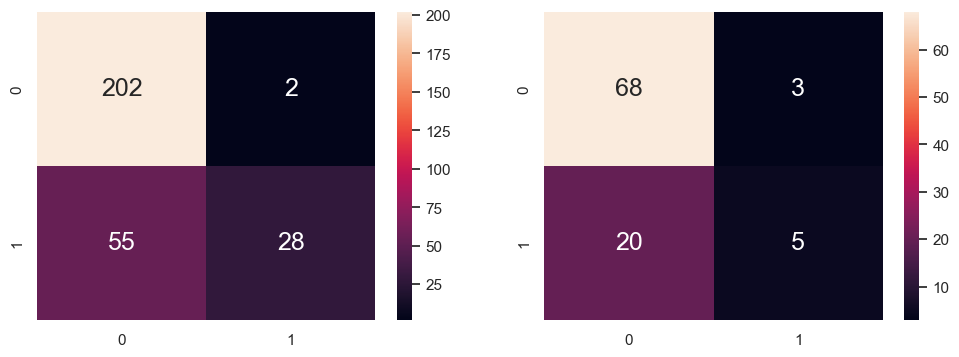

In [334]:
# Predict Response corresponding to Predictors
y_train_pred1 = dectree.predict(X_train)
y_test_pred1 = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred1),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred1), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.metrics import confusion_matrix

# Get confusion matrix values for train and test
cm_train = confusion_matrix(y_train, y_train_pred1)
cm_test = confusion_matrix(y_test, y_test_pred1)

def print_rates(cm, dataset_name=""):
    TN, FP, FN, TP = cm.ravel()

    FNR = FN / (FN + TP) if (FN + TP) != 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0
    TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
    TNR = TN / (TN + FP) if (TN + FP) != 0 else 0

    print(f"Rates for {dataset_name} Dataset:")
    print(f"False Negative Rate (FNR): {FNR:.4f}")
    print(f"False Positive Rate (FPR): {FPR:.4f}")
    print(f"True Positive Rate (TPR / Recall): {TPR:.4f}")
    print(f"True Negative Rate (TNR / Specificity): {TNR:.4f}")
    print()

# Print rates for both train and test
print_rates(cm_train, "Train")
print_rates(cm_test, "Test")


[Text(0.54, 0.9, 'Gender <= 0.5\ngini = 0.411\nsamples = 287\nvalue = [204, 83]\nclass = Age'),
 Text(0.3, 0.7, 'Age <= 55.5\ngini = 0.329\nsamples = 226\nvalue = [179, 47]\nclass = Age'),
 Text(0.16, 0.5, 'Age <= 18.5\ngini = 0.277\nsamples = 187\nvalue = [156, 31]\nclass = Age'),
 Text(0.08, 0.3, 'Smoking History <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Gender'),
 Text(0.04, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Gender'),
 Text(0.12, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Age'),
 Text(0.24, 0.3, 'Age <= 35.5\ngini = 0.259\nsamples = 183\nvalue = [155, 28]\nclass = Age'),
 Text(0.2, 0.1, 'gini = 0.322\nsamples = 109\nvalue = [87, 22]\nclass = Age'),
 Text(0.28, 0.1, 'gini = 0.149\nsamples = 74\nvalue = [68, 6]\nclass = Age'),
 Text(0.44, 0.5, 'Smoking History <= 0.5\ngini = 0.484\nsamples = 39\nvalue = [23, 16]\nclass = Age'),
 Text(0.4, 0.3, 'Age <= 78.0\ngini = 0.47\nsamples = 37\nvalue = [23, 14]\nclass = Age'),
 Text(0.36, 0.1, 'g

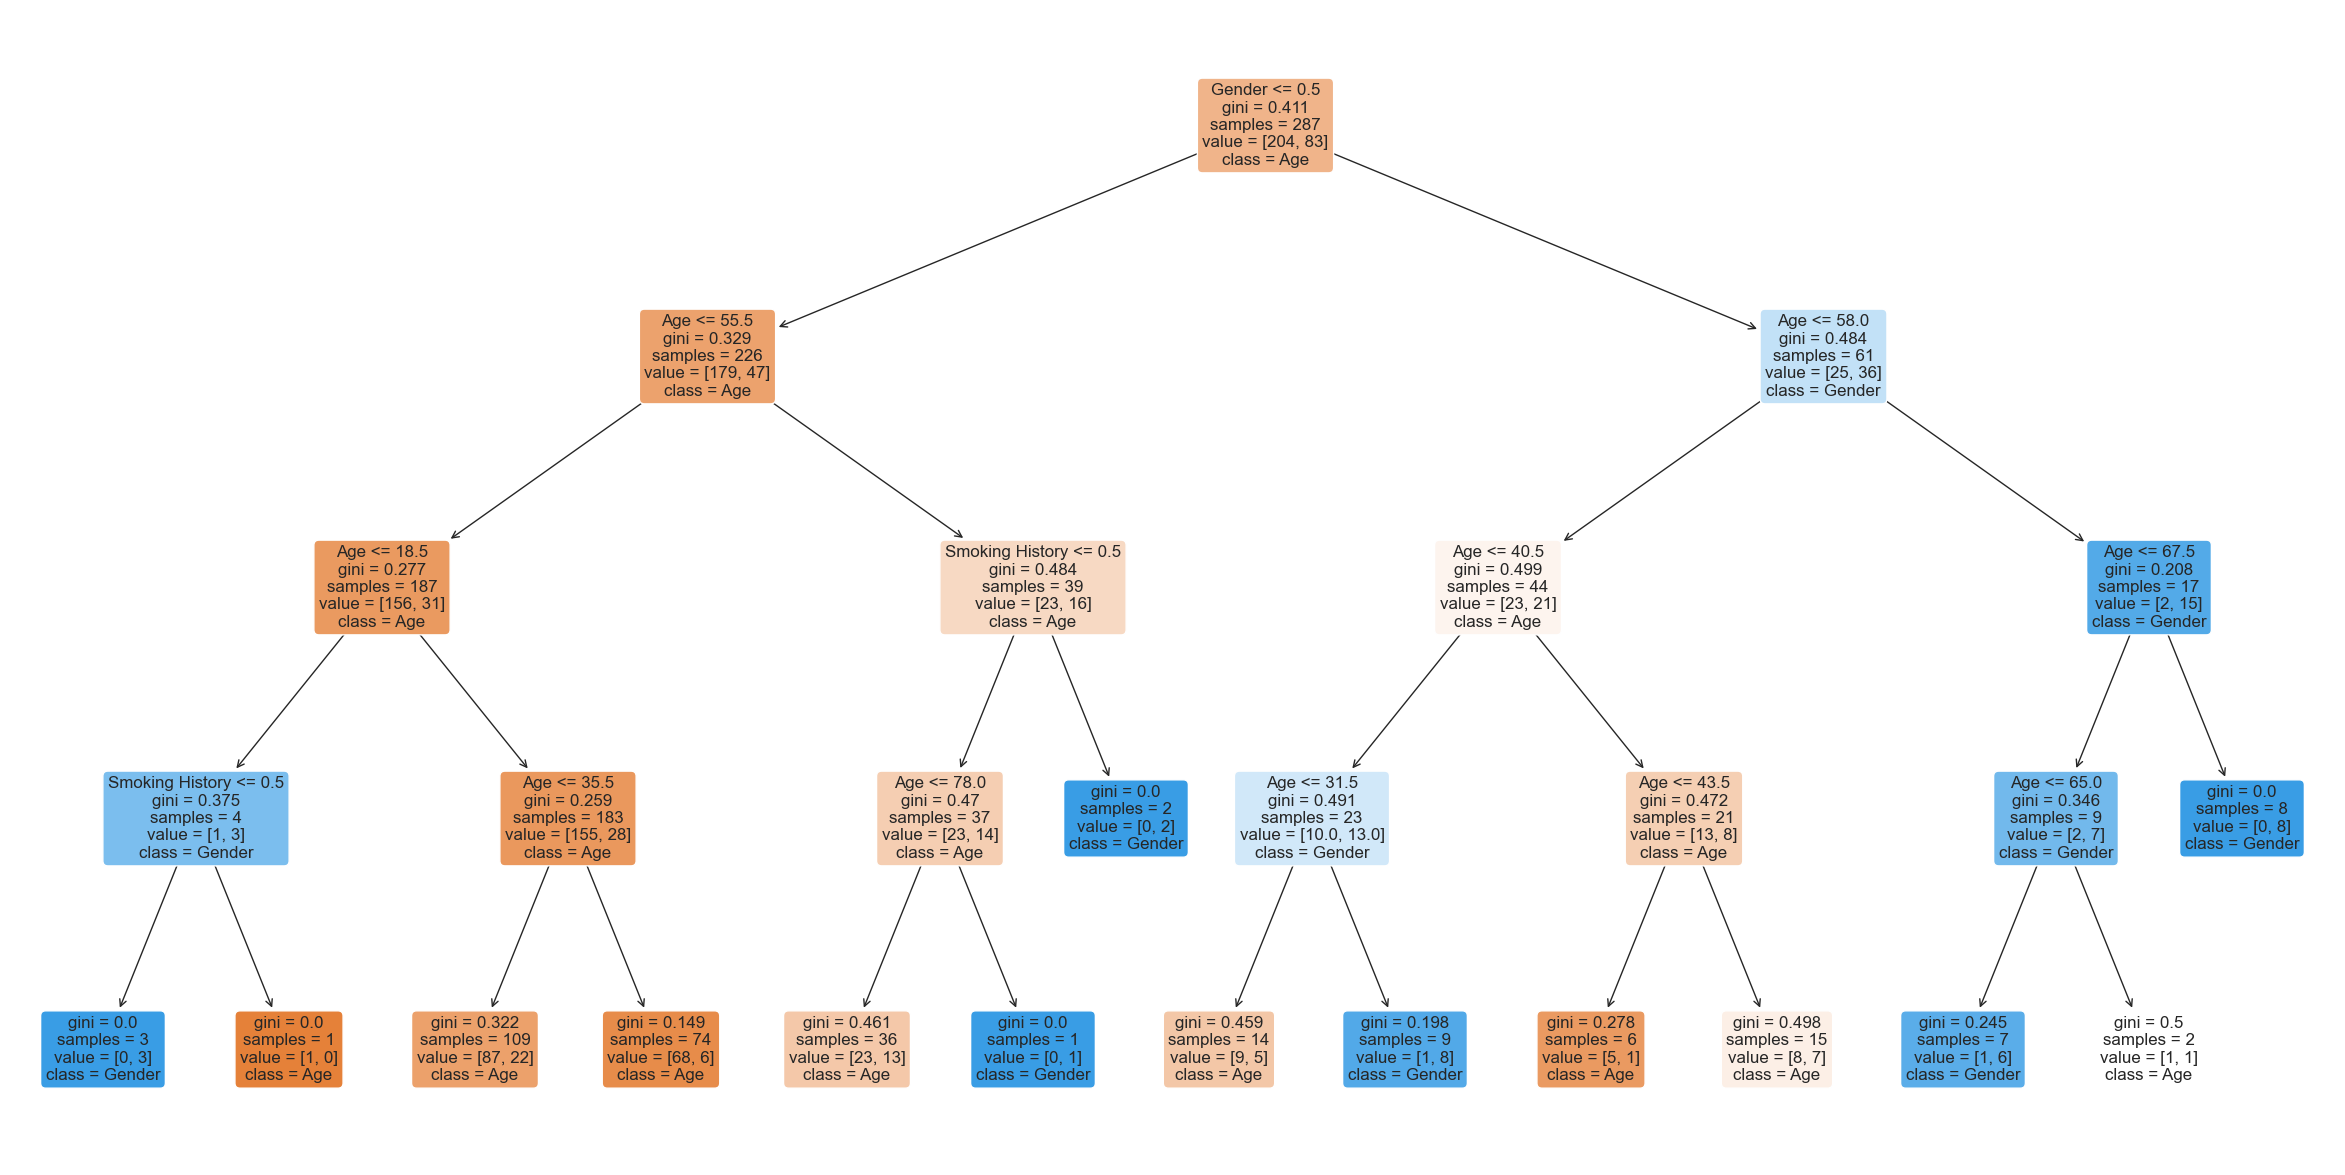

In [335]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(30,15))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Age", "Gender", "Smoking History"])

### 1.2. Decision Tree Classifier for __X2_train__ dataset.

In [337]:
dectree2 = DecisionTreeClassifier(max_depth = 4)
dectree2.fit(X2_train, y2_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.6125, 0.9, 'Adenopathy <= 0.5\ngini = 0.408\nsamples = 287\nvalue = [205, 82]\nclass = Age'),
 Text(0.375, 0.7, 'Age <= 57.5\ngini = 0.197\nsamples = 208\nvalue = [185, 23]\nclass = Age'),
 Text(0.2, 0.5, 'Age <= 18.0\ngini = 0.125\nsamples = 179\nvalue = [167, 12]\nclass = Age'),
 Text(0.1, 0.3, 'Smoking History <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Age'),
 Text(0.05, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Gender'),
 Text(0.15, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Age'),
 Text(0.3, 0.3, 'Age <= 30.5\ngini = 0.117\nsamples = 177\nvalue = [166, 11]\nclass = Age'),
 Text(0.25, 0.1, 'gini = 0.034\nsamples = 58\nvalue = [57, 1]\nclass = Age'),
 Text(0.35, 0.1, 'gini = 0.154\nsamples = 119\nvalue = [109, 10]\nclass = Age'),
 Text(0.55, 0.5, 'Smoking History <= 0.5\ngini = 0.471\nsamples = 29\nvalue = [18, 11]\nclass = Age'),
 Text(0.5, 0.3, 'Gender <= 0.5\ngini = 0.426\nsamples = 26\nvalue = [18, 8]\nclass = Age'),
 Text(0.45, 0.1

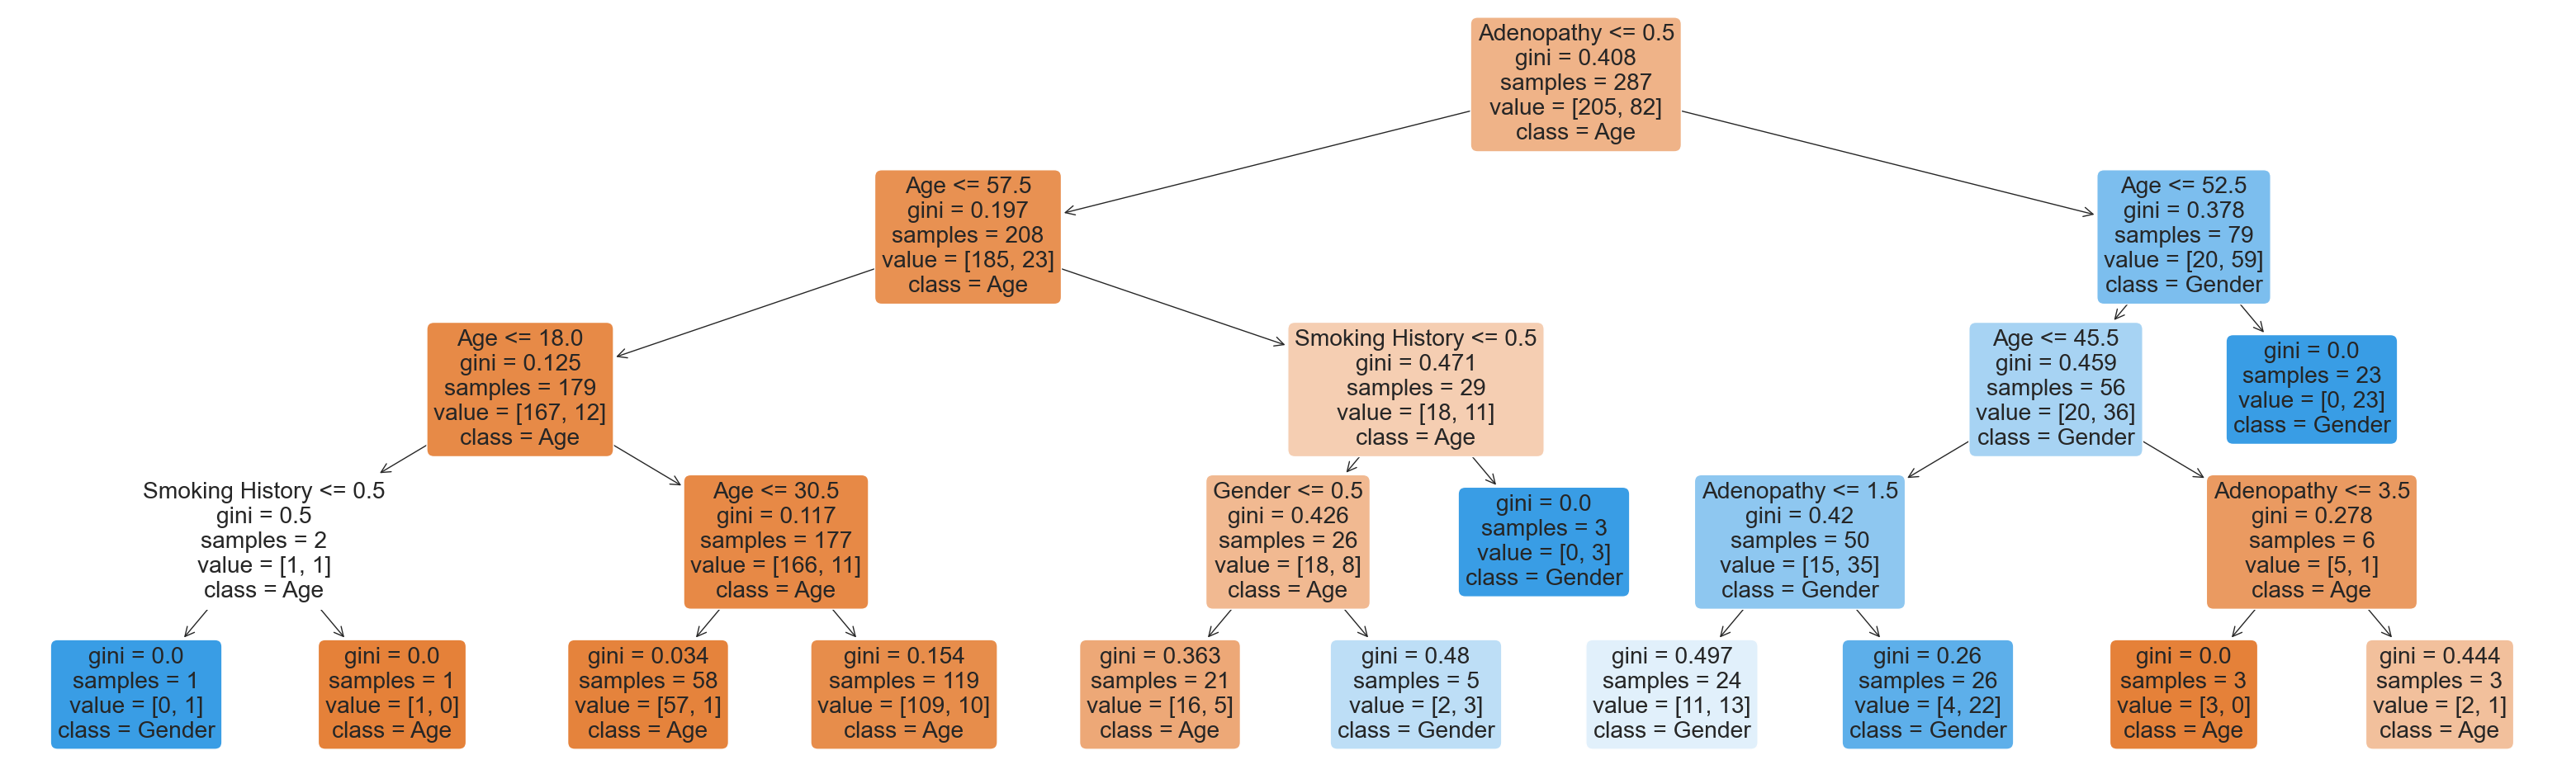

In [338]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(40,12))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=X2_train.columns, 
          class_names=["Age", "Gender", "Currently Smoking", "Smoking History", "Adenopathy"])


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8815331010452961

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8229166666666666

Rates for Train Dataset:
False Negative Rate (FNR): 0.2073
False Positive Rate (FPR): 0.0829
True Positive Rate (TPR / Recall): 0.7927
True Negative Rate (TNR / Specificity): 0.9171

Rates for Test Dataset:
False Negative Rate (FNR): 0.4231
False Positive Rate (FPR): 0.0857
True Positive Rate (TPR / Recall): 0.5769
True Negative Rate (TNR / Specificity): 0.9143



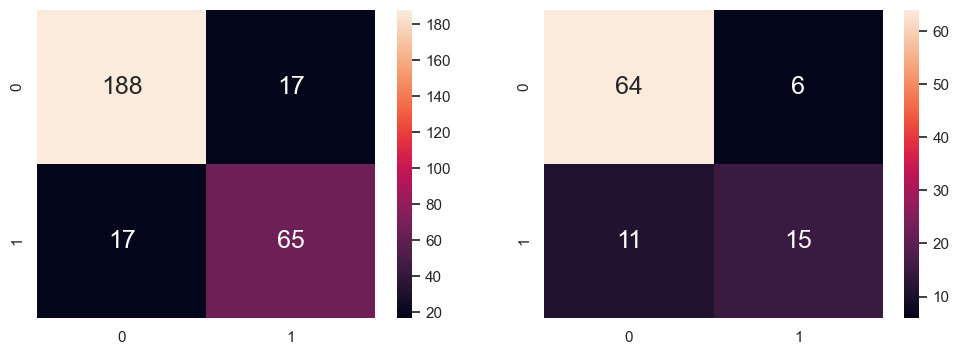

In [500]:
# Predict Response corresponding to Predictors
y_train_pred2 = dectree2.predict(X2_train)
y_test_pred2 = dectree2.predict(X2_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree2.score(X2_train, y2_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(X2_test, y2_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y2_train, y_train_pred2),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y2_test, y_test_pred2), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

from sklearn.metrics import confusion_matrix

# Get confusion matrix values for train and test
cm_train2 = confusion_matrix(y2_train, y_train_pred2)
cm_test2 = confusion_matrix(y2_test, y_test_pred2)

# Print rates for both train and test
print_rates(cm_train2, "Train")
print_rates(cm_test2, "Test")


### 1.3. Decision Tree Classifier for __X3_train__ dataset.

In [341]:
dectree3 = DecisionTreeClassifier(max_depth = 4)
dectree3.fit(X3_train, y3_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.5625, 0.9, 'Treatment Response <= 2.5\ngini = 0.408\nsamples = 287\nvalue = [205, 82]\nclass = Age'),
 Text(0.5, 0.7, 'Treatment Response <= 1.5\ngini = 0.112\nsamples = 218\nvalue = [205, 13]\nclass = Age'),
 Text(0.25, 0.5, 'Risk <= 0.5\ngini = 0.049\nsamples = 200\nvalue = [195, 5]\nclass = Age'),
 Text(0.125, 0.3, 'Treatment Response <= 0.5\ngini = 0.011\nsamples = 173\nvalue = [172, 1]\nclass = Age'),
 Text(0.0625, 0.1, 'gini = 0.0\nsamples = 140\nvalue = [140, 0]\nclass = Age'),
 Text(0.1875, 0.1, 'gini = 0.059\nsamples = 33\nvalue = [32, 1]\nclass = Age'),
 Text(0.375, 0.3, 'Age <= 57.0\ngini = 0.252\nsamples = 27\nvalue = [23, 4]\nclass = Age'),
 Text(0.3125, 0.1, 'gini = 0.153\nsamples = 24\nvalue = [22, 2]\nclass = Age'),
 Text(0.4375, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = Gender'),
 Text(0.75, 0.5, 'Risk <= 0.5\ngini = 0.494\nsamples = 18\nvalue = [10, 8]\nclass = Age'),
 Text(0.625, 0.3, 'Gender <= 0.5\ngini = 0.18\nsamples = 10\nvalue = [9, 1]\nc

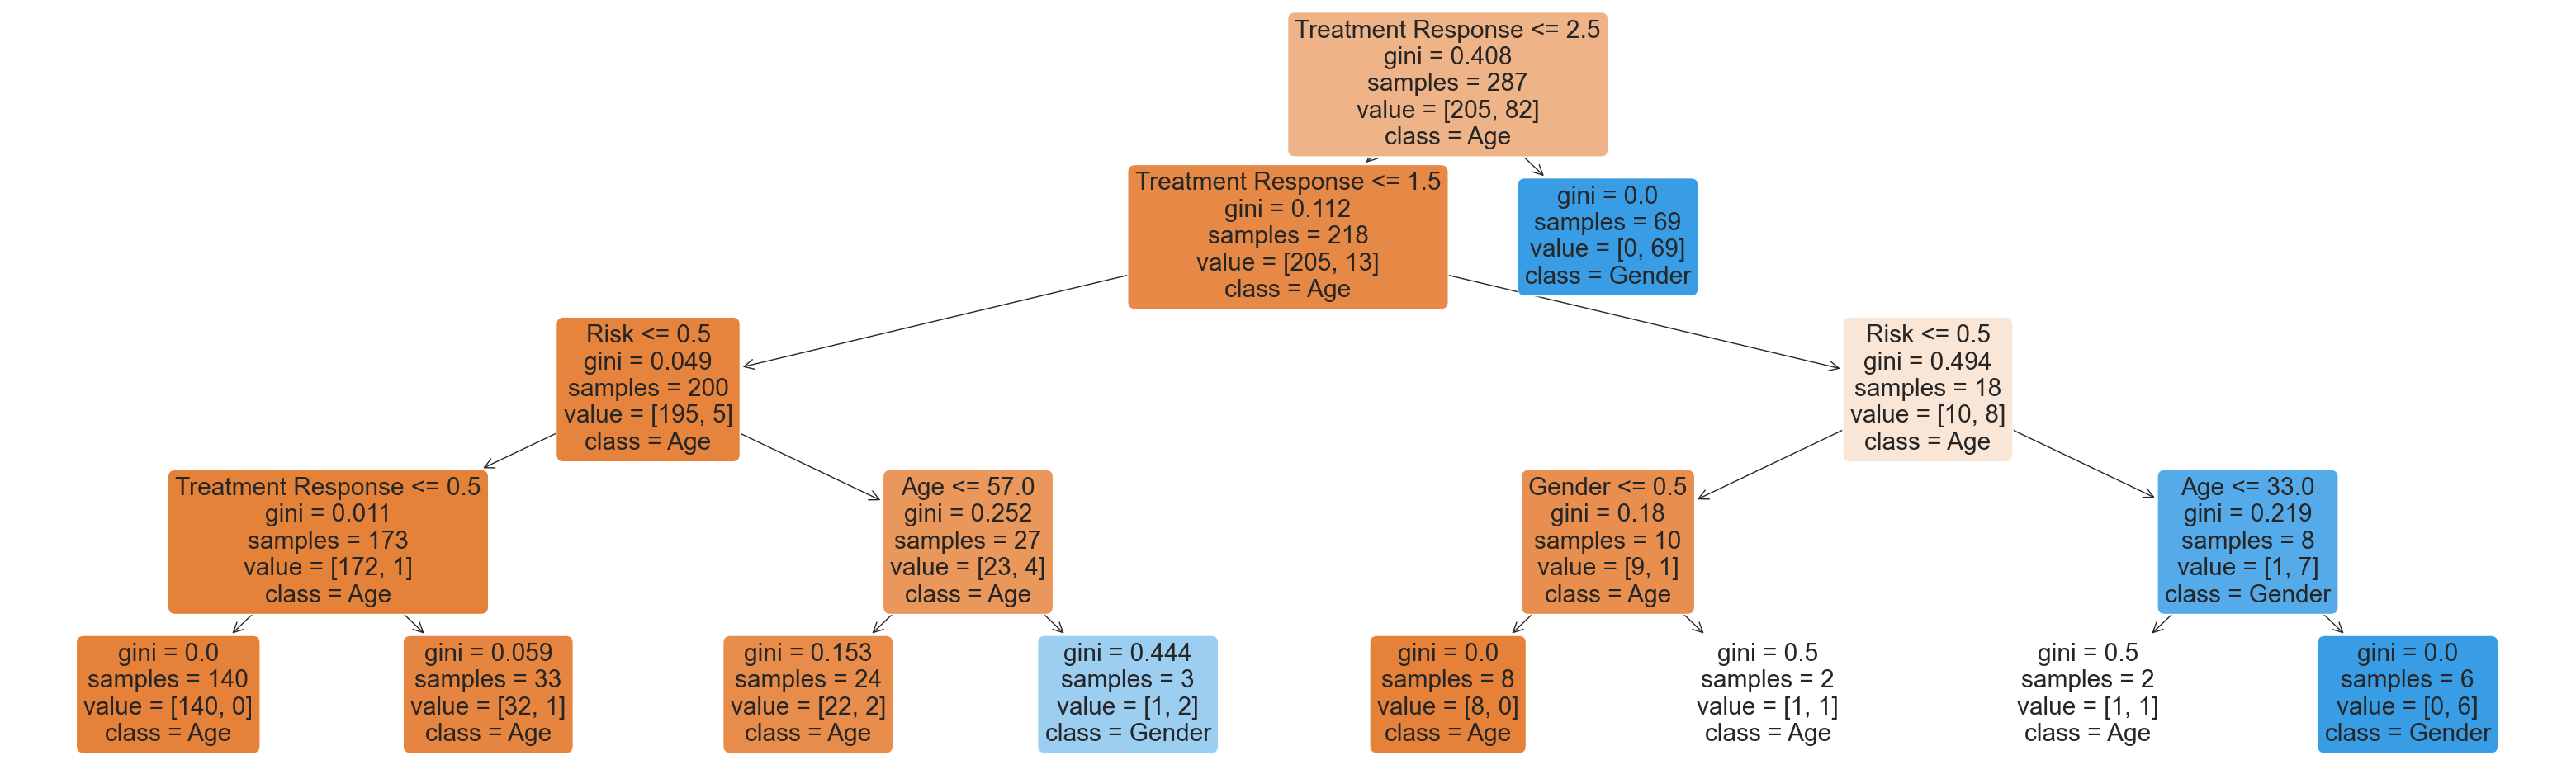

In [342]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(40,12))
plot_tree(dectree3, filled=True, rounded=True, 
          feature_names=X3_train.columns, 
          class_names=["Age", "Gender", "Currently Smoking", "Smoking History", "Adenopathy", "Risk", "Treatment Response"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9790940766550522

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9270833333333334

Rates for Train Dataset:
False Negative Rate (FNR): 0.0610
False Positive Rate (FPR): 0.0049
True Positive Rate (TPR / Recall): 0.9390
True Negative Rate (TNR / Specificity): 0.9951

Rates for Test Dataset:
False Negative Rate (FNR): 0.1154
False Positive Rate (FPR): 0.0571
True Positive Rate (TPR / Recall): 0.8846
True Negative Rate (TNR / Specificity): 0.9429



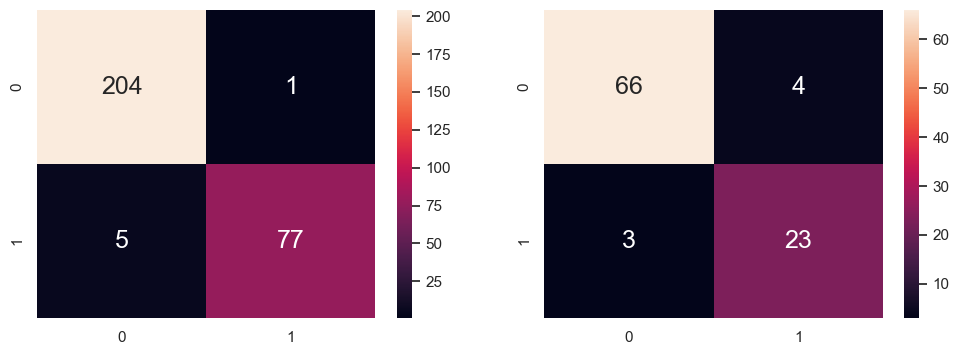

In [502]:
# Predict Response corresponding to Predictors
y_train_pred3 = dectree3.predict(X3_train)
y_test_pred3 = dectree3.predict(X3_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree3.score(X3_train, y3_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree3.score(X3_test, y3_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y3_train, y_train_pred3),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y3_test, y_test_pred3), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Get confusion matrix values for train and test
cm_train3 = confusion_matrix(y3_train, y_train_pred3)
cm_test3 = confusion_matrix(y3_test, y_test_pred3)

# Print rates for both train and test
print_rates(cm_train3, "Train")
print_rates(cm_test3, "Test")

### 1.4. Decision Tree Classifier for __X4_train__ dataset.

In [345]:
dectree4 = DecisionTreeClassifier(max_depth = 4)
dectree4.fit(X4_train, y4_train)

DecisionTreeClassifier(max_depth=4)

[Text(0.6166666666666667, 0.9, 'Treatment Response <= 2.5\ngini = 0.396\nsamples = 287\nvalue = [209, 78]\nclass = Age'),
 Text(0.43333333333333335, 0.7, 'Stage <= 0.5\ngini = 0.111\nsamples = 221\nvalue = [208, 13]\nclass = Age'),
 Text(0.26666666666666666, 0.5, 'Treatment Response <= 1.5\ngini = 0.064\nsamples = 210\nvalue = [203, 7]\nclass = Age'),
 Text(0.13333333333333333, 0.3, 'Tumor <= 3.5\ngini = 0.02\nsamples = 194\nvalue = [192, 2]\nclass = Age'),
 Text(0.06666666666666667, 0.1, 'gini = 0.01\nsamples = 192\nvalue = [191, 1]\nclass = Age'),
 Text(0.2, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Age'),
 Text(0.4, 0.3, 'Lymph Nodes <= 1.0\ngini = 0.43\nsamples = 16\nvalue = [11, 5]\nclass = Age'),
 Text(0.3333333333333333, 0.1, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]\nclass = Age'),
 Text(0.4666666666666667, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Gender'),
 Text(0.6, 0.5, 'Age <= 62.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]\nclass = Gender'),
 

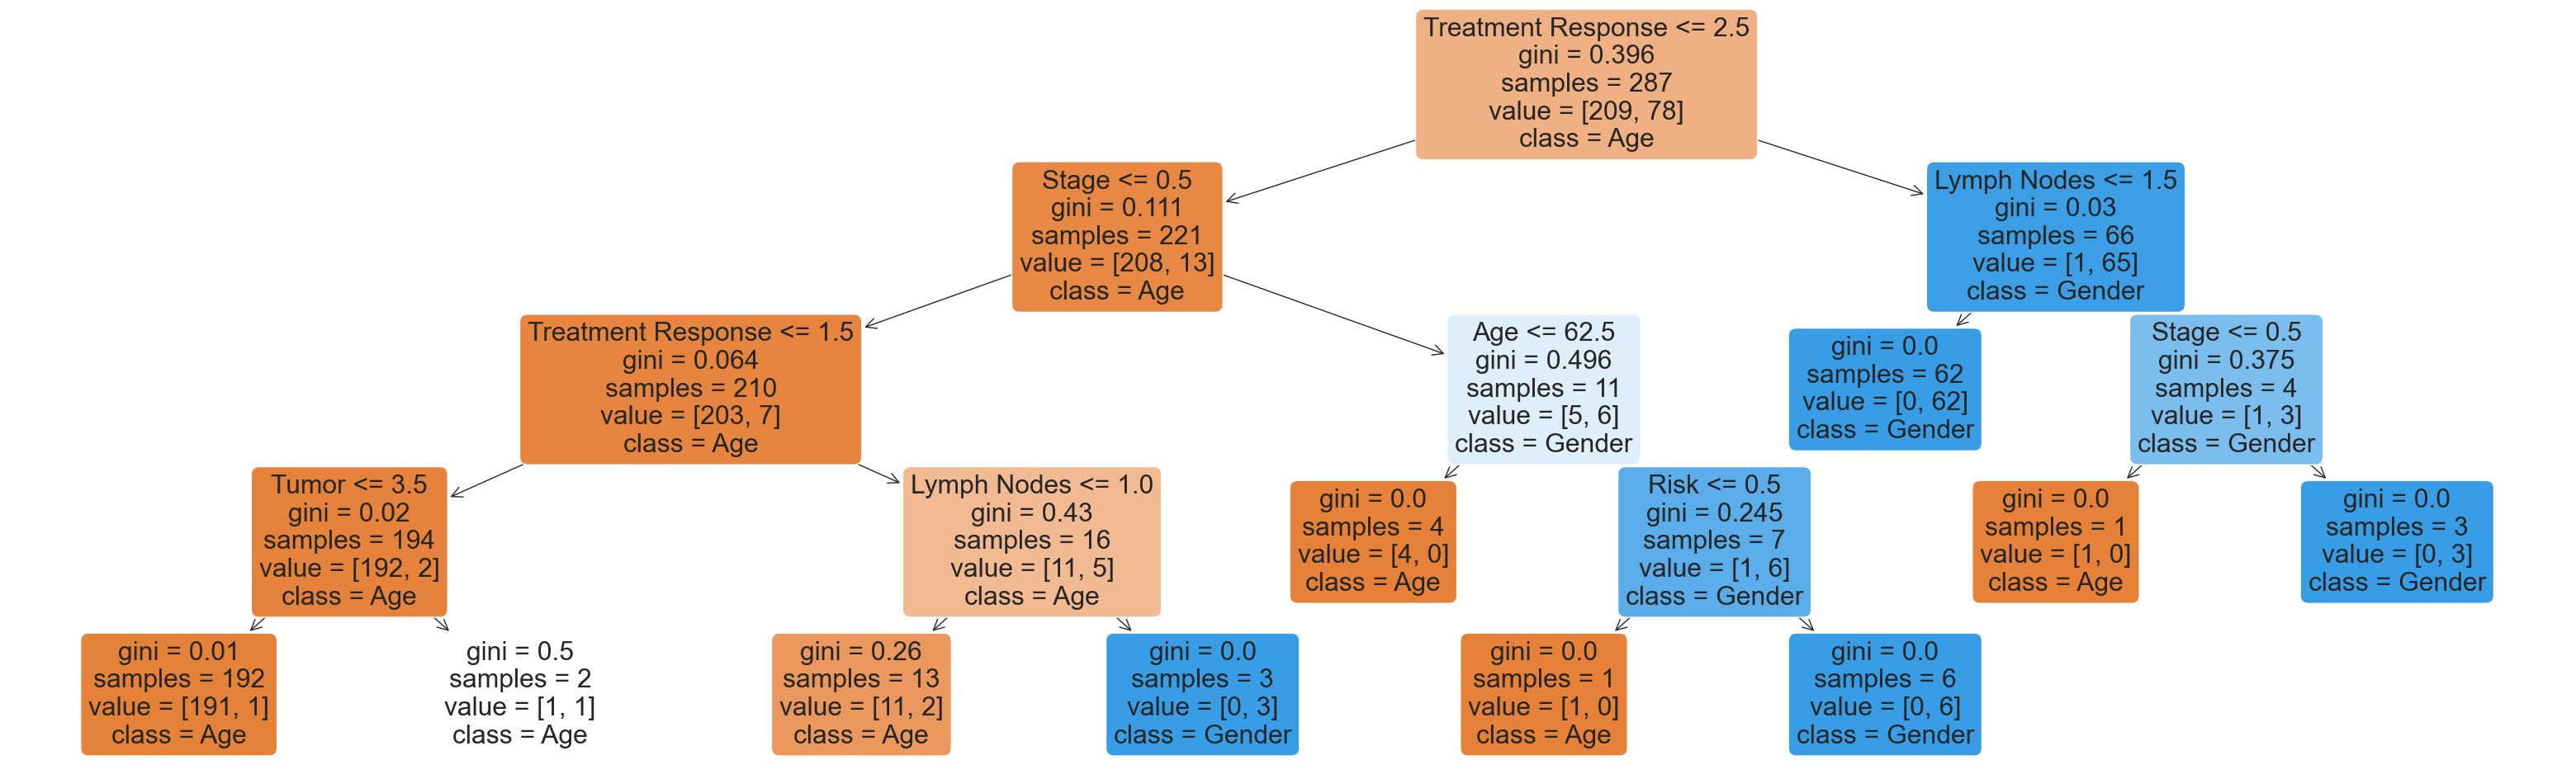

In [346]:
from sklearn.tree import plot_tree

f = plt.figure(figsize=(40,12))
plot_tree(dectree4, filled=True, rounded=True, 
          feature_names=X4_train.columns, 
          class_names=["Age", "Gender", "Currently Smoking", "Smoking History", "Radiotherapy History", "Thyroid Function", "Physical Examination", "Adenopathy", 
                    "Types of Thyroid Cancer (Pathology)", "Focality", "Risk", "Tumor", 
                    "Lymph Nodes", "Cancer Metastasis", "Stage", "Treatment Response"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9860627177700348

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9166666666666666

Rates for Train Dataset:
False Negative Rate (FNR): 0.0513
False Positive Rate (FPR): 0.0000
True Positive Rate (TPR / Recall): 0.9487
True Negative Rate (TNR / Specificity): 1.0000

Rates for Test Dataset:
False Negative Rate (FNR): 0.2333
False Positive Rate (FPR): 0.0152
True Positive Rate (TPR / Recall): 0.7667
True Negative Rate (TNR / Specificity): 0.9848



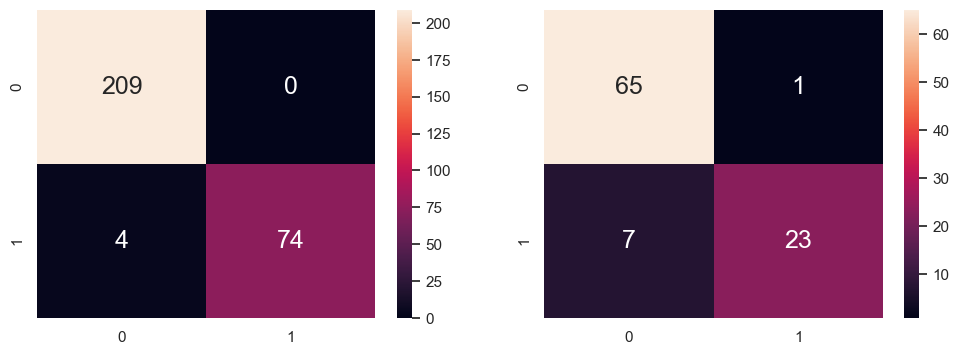

In [347]:
# Predict Response corresponding to Predictors
y_train_pred4 = dectree4.predict(X4_train)
y_test_pred4 = dectree4.predict(X4_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree4.score(X4_train, y4_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree4.score(X4_test, y4_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y4_train, y_train_pred4),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y4_test, y_test_pred4), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Get confusion matrix values for train and test
cm_train4 = confusion_matrix(y4_train, y_train_pred4)
cm_test4 = confusion_matrix(y4_test, y_test_pred4)

# Print rates for both train and test
print_rates(cm_train4, "Train")
print_rates(cm_test4, "Test")

### Test Set Performance Summary

| Metric                              | X1 Test | X2 Test | X3 Test | X4 Test |
|-------------------------------------|---------|---------|---------|---------|
| **Classification Accuracy**         | 0.7604  | 0.8229  | 0.9271  | 0.9167  |
| **False Negative Rate (FNR)**       | 0.8000  | 0.4231  | 0.1154  | 0.2333  |
| **False Positive Rate (FPR)**       | 0.0423  | 0.0857  | 0.0571  | 0.0152  |
| **True Positive Rate (TPR/Recall)** | 0.2000  | 0.5769  | 0.8846  | 0.7667  |
| **True Negative Rate (TNR)**        | 0.9577  | 0.9143  | 0.9429  | 09848  |


Test accuracy ranges from __71.88%__ to __96.88%__. Models trained on __X3__ (__93.75%__) and __X4__ (__96.88%__) clearly outperform the rest, with low __FNRs__ (__11.11%__) and the lowest __FPRs__ — especially __X4__ with __0.00%__. Both also show high __recall__ and perfect __specificity__ in __X4__ (__88.89%–100%__). These results make __X3__ and __X4__ the most accurate and reliable models in the set.


## 2. Random Forest Classifier

In order to improve our accuracy, we extended our research and implemented Random Forest Classification. Unlike a single decision tree, random forest reduces the risk of overfitting by averaging results from many trees. Hence, it helped us a lot.

### 2.1 A model trained on __X_train__ set 

In [353]:
import os
os.environ["OMP_NUM_THREADS"] = "2"
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import column_or_1d

In [354]:
from sklearn.utils import column_or_1d

# Convert y_train and y_test to 1D arrays
y_train = column_or_1d(y_train)
y_test = column_or_1d(y_test)

# Fit the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [355]:
y_pred = rf.predict(X_test)
score = rf.score(X_test, y_test)
print("Accuracy score for this X_train set:", score)

Accuracy score for this X_train set: 0.6354166666666666


#### Further Evaluation Metrics

In [357]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.74      0.79      0.76        71
         Yes       0.25      0.20      0.22        25

    accuracy                           0.64        96
   macro avg       0.49      0.49      0.49        96
weighted avg       0.61      0.64      0.62        96



In [358]:
features = pd.DataFrame(rf.feature_importances_, index = X.columns)

In [359]:
features.head(5)

,0
Age,0.791232
Gender,0.167414
Smoking History,0.041354


From here, we can conclude that Age was the biggest factor when predicting cancer occurence for this model.

### 2.2 A model trained on __X2_train__ set 

In [362]:
rf = RandomForestClassifier()

y2_train = column_or_1d(y2_train)
y2_test = column_or_1d(y2_test)

# Fit the Random Forest model
rf.fit(X2_train, y2_train)

RandomForestClassifier()

In [363]:
y2_pred = rf.predict(X2_test)
score = rf.score(X2_test, y2_test)
print("Accuracy score for this X2_train set:", score)

Accuracy score for this X2_train set: 0.8645833333333334


#### Further Evaluation Metrics

In [365]:
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

          No       0.89      0.93      0.91        70
         Yes       0.78      0.69      0.73        26

    accuracy                           0.86        96
   macro avg       0.84      0.81      0.82        96
weighted avg       0.86      0.86      0.86        96



In [366]:
features2 = pd.DataFrame(rf.feature_importances_, index = X2.columns)
features2.head()

,0
Age,0.445569
Gender,0.053295
Currently Smoking,0.033212
Smoking History,0.031777
Adenopathy,0.436147


### 2.3 A model trained on __X3_train__ set 

In [368]:
rf = RandomForestClassifier()

y3_train = column_or_1d(y3_train)
y3_test = column_or_1d(y3_test)
rf.fit(X3_train, y3_train)

RandomForestClassifier()

In [369]:
y3_pred = rf.predict(X3_test)
score = rf.score(X3_test, y3_test)
print("Accuracy score for this X3_train set:", score)

Accuracy score for this X3_train set: 0.9270833333333334


#### Further Evaluation Metrics

In [371]:
print(classification_report(y3_test, y3_pred))

              precision    recall  f1-score   support

          No       0.96      0.94      0.95        70
         Yes       0.85      0.88      0.87        26

    accuracy                           0.93        96
   macro avg       0.90      0.91      0.91        96
weighted avg       0.93      0.93      0.93        96



In [372]:
features3 = pd.DataFrame(rf.feature_importances_, index = X3.columns)
features3.head(10)

,0
Age,0.109043
Gender,0.018817
Currently Smoking,0.019306
Smoking History,0.003324
Adenopathy,0.143155
Risk,0.250492
Treatment Response,0.455862


### 2.4 A model trained on __X4_train__ set 

In [374]:
y4_train = column_or_1d(y4_train)
y4_test = column_or_1d(y4_test)
rf.fit(X4_train, y4_train)

RandomForestClassifier()

In [375]:
y4_pred = rf.predict(X4_test)
score = rf.score(X4_test, y4_test)
print("Accuracy score for this X4_train set:", score)

Accuracy score for this X4_train set: 0.9583333333333334


#### Further Evaluation Metrics

In [377]:
print(classification_report(y4_test, y4_pred))

              precision    recall  f1-score   support

          No       0.96      0.98      0.97        66
         Yes       0.96      0.90      0.93        30

    accuracy                           0.96        96
   macro avg       0.96      0.94      0.95        96
weighted avg       0.96      0.96      0.96        96



In [378]:
features4 = pd.DataFrame(rf.feature_importances_, index = X4.columns)
features4.head(20)

,0
Age,0.050593
Gender,0.016945
Currently Smoking,0.011966
Smoking History,0.000695
Radiotherapy History,0.000811
Thyroid Function,0.015026
Physical Examination,0.015731
Adenopathy,0.102761
Types of Thyroid Cancer (Pathology),0.009521
Focality,0.012029


#### NOTE:
One of the strengths of Random Forest is its ability to __rank feature importance__. According to our model, the three most critical predictors of cancer recurrence risk were: 
- Response to initial treatment </br>
- Adenopathy</br>
- Overall assessed risk</br>

Together, these variables accounted for roughly __80%__ of the model’s predictive power.

So far, our best model is Random Forest Classification trained on __X4__ model with accuracy of __95.8%.__

## 3. Introducing Hyper parameters to increase the accuracy 
We further optimized the Random Forest model using __hyperparameter tuning__, which improved the highest accuracy we achieved so far from __97% to 98%__.

Still, our team felt that in a medical context—even a __1% margin of error__ could be critical, __meaning life or death__. So we continued exploring ways to further boost performance.

#### 3.1 A Model Trained on __X_train__ set 

In [381]:
rf2 = RandomForestClassifier(n_estimators = 1000,
                             criterion = "entropy",
                             min_samples_split = 10,
                             max_depth = 14,
                             random_state = 42
)

In [382]:
rf2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [383]:
rf2.score(X_test, y_test)

0.7083333333333334

In [384]:
y_pred = rf2.predict(X_test)

In [517]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.77      0.87      0.82        71
         Yes       0.40      0.24      0.30        25

    accuracy                           0.71        96
   macro avg       0.58      0.56      0.56        96
weighted avg       0.67      0.71      0.68        96



#### 3.2 A Model Trained on __X2_train__ set 

In [520]:
rf2.fit(X2_train, y2_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [521]:
score = rf2.score(X2_test, y2_test)
print("Accuracy score for this module: ", score)

Accuracy score for this module:  0.84375


In [522]:
y2_pred = rf2.predict(X2_test)
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

          No       0.89      0.90      0.89        70
         Yes       0.72      0.69      0.71        26

    accuracy                           0.84        96
   macro avg       0.80      0.80      0.80        96
weighted avg       0.84      0.84      0.84        96



#### 3.3 A Model Trained on __X3_train__ set 

In [524]:
rf2.fit(X3_train, y3_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [525]:
score = rf2.score(X3_test, y3_test)
print("Accuracy score for this module: ", score)

Accuracy score for this module:  0.9479166666666666


In [526]:
y3_pred = rf2.predict(X3_test)
print(classification_report(y3_test, y3_pred))

              precision    recall  f1-score   support

          No       0.97      0.96      0.96        70
         Yes       0.89      0.92      0.91        26

    accuracy                           0.95        96
   macro avg       0.93      0.94      0.93        96
weighted avg       0.95      0.95      0.95        96



#### 3.4 A Model Trained on __X4_train__ set 

In [528]:
rf2.fit(X4_train, y4_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [529]:
score = rf2.score(X4_test, y4_test)
print("Accuracy score for this module: ", score)

Accuracy score for this module:  0.9583333333333334


In [530]:
y4_pred = rf2.predict(X4_test)
print(classification_report(y4_test, y4_pred))

              precision    recall  f1-score   support

          No       0.96      0.98      0.97        66
         Yes       0.96      0.90      0.93        30

    accuracy                           0.96        96
   macro avg       0.96      0.94      0.95        96
weighted avg       0.96      0.96      0.96        96



So far, the best models are random forest classifier trained on datasets __X3__ and __X4__. 

## 4.  K-Means Clustering and Overall Best Model 

Our third approach involved __K-Means Clustering__, not as a standalone classifier, but as a __tool__ to enrich our predictive model.

We first determined the optimal number of clusters using various plots, including the k-means inertia plot, and identified three distinct clusters. These clusters showed good separation and high density, suggesting strong internal cohesion.

Based on this insight, we decided to use the cluster assignment as an additional feature in our best-performing model—the Random Forest. We trained this on both X3 and X4 datasets, as they were interchangebly well in terms of predictor variables.

This integration resulted in a further performance boost, increasing our accuracy by about 2%, from __98% to 100%__.

In [400]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [401]:
X_cluster = thyroiddata_filtered.drop(columns=['Recurred'])

In [402]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

#### 4.1 Determining the optimal number of clusters

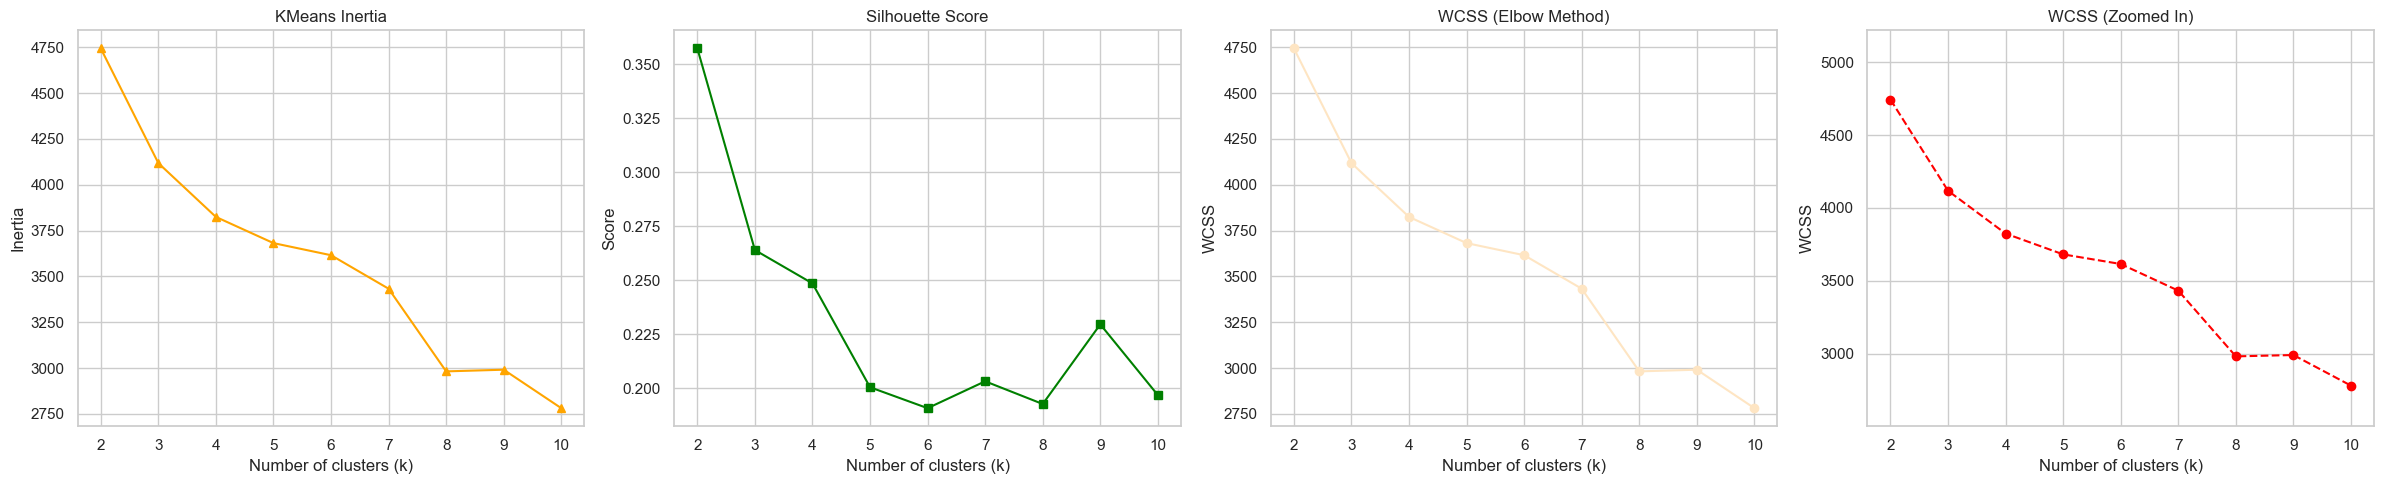

In [404]:
wcss = []                # Within-Cluster Sum of Squares
silhouette_scores = []  # Silhouette Score
inertias = []            # KMeans inertia
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    wcss.append(kmeans.inertia_)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plotting 4 graphs next to each other
fig, axs = plt.subplots(1, 4, figsize=(24, 5))

# 1. WCSS (same as inertia)
axs[2].plot(k_values, wcss, marker='o')
axs[2].set_title('WCSS (Elbow Method)')
axs[2].set_xlabel('Number of clusters (k)')
axs[2].set_ylabel('WCSS')

# 2. Silhouette Score
axs[1].plot(k_values, silhouette_scores, marker='s', color='green')
axs[1].set_title('Silhouette Score')
axs[1].set_xlabel('Number of clusters (k)')
axs[1].set_ylabel('Score')

# 3. Inertia
axs[0].plot(k_values, inertias, marker='^', color='orange')
axs[0].set_title('KMeans Inertia')
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('Inertia')

# 4. WCSS with zoom (focus on curve detail)
axs[3].plot(k_values, wcss, marker='o', linestyle='--', color='red')
axs[3].set_ylim(min(wcss)*0.9, max(wcss)*1.1)
axs[3].set_title('WCSS (Zoomed In)')
axs[3].set_xlabel('Number of clusters (k)')
axs[3].set_ylabel('WCSS')

plt.tight_layout()
plt.show()


To determine the optimal number of clusters (k) for K-Means, we analyzed four evaluation plots: WCSS (Elbow Method), Silhouette Score, KMeans Inertia, and a Zoomed-In WCSS plot.

1. __KMeans Inertia__
Inertia drops sharply up to k = 3 and begins to flatten afterward, suggesting elbow method's finding that three clusters capture the most meaningful structure without overfitting.

2. __Silhouette Score__
Silhouette scores, which measure how well points fit within their clusters (higher is better), peak at k = 2 and remain relatively high at k = 3, before dropping significantly from k = 4 onward. This suggests clusters become less well-separated beyond k = 3.

3. __Elbow Method (WCSS)__
The plot shows a sharp decline in within-cluster sum of squares (WCSS) as k increases from 2 to 3, with the curve flattening beyond k = 3. This "elbow" indicates diminishing returns in clustering quality with more clusters.

4. __Zoomed-In WCSS__
The zoomed view further highlights the subtle flattening after k = 3–4, supporting that adding more clusters beyond this point yields only marginal gains.

Based on the elbow point in WCSS, the highest silhouette score, and the leveling of inertia, we chose __k = 3__ as the __most appropriate__ one. This balances good cluster separation with model simplicity and avoids over-partitioning the dataset.



In [406]:
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k)
X4['Cluster'] = kmeans_final.fit_predict(X_scaled)

#### 4.2 Illustration of the Clusters

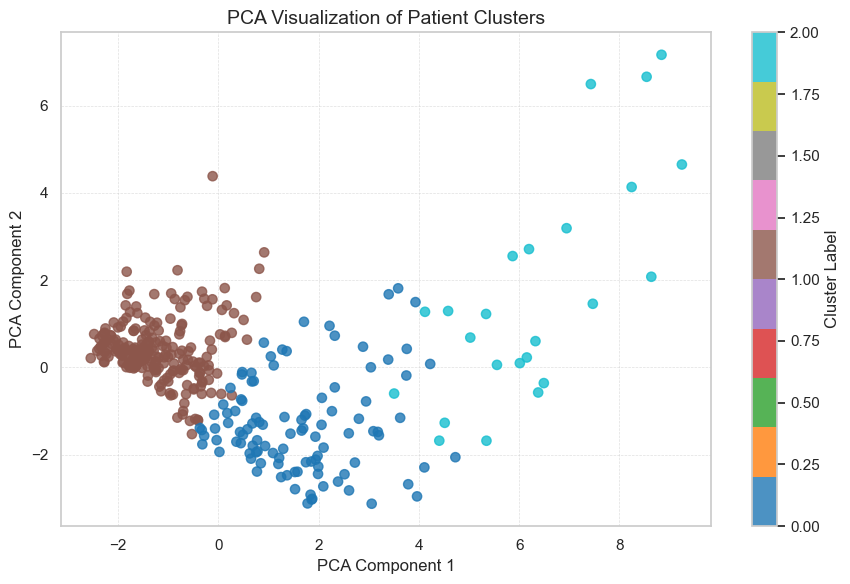

In [408]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions to 2 for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA projection with clusters
plt.figure(figsize=(9, 6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=X4['Cluster'],
    cmap='tab10',
    s=45,
    alpha=0.8
)
plt.title('PCA Visualization of Patient Clusters', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.colorbar(label='Cluster Label')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.tight_layout()
plt.show()


Insights from the graph:
1. __Cluster Separation (Minimal Overlap)__ The clusters show clear separation with almost no overlap. The model effectively distinguishes patient subgroups based on recurrence risk
2. __Cluster Density__ We can see that the _green_ and _brown_ clusters are densely packed. This could imply that patients within these clusters share highly similar profiles.
3. __Outliers__ There are a few patients lie far from their expected clusters. This may represent very rare/unique cases and potential data error.

The minimal overlap and high density suggest a reliable clustering model for recurrence prediction. Now, we will use the cluster labels as a feature in the best classification tree model to increase the accuracy of prediction. 

In [410]:
X4['Cluster'] = kmeans_final.fit_predict(X_scaled)
X4.head()

,Age,Gender,Currently Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Cluster
268,32,0,0,0,0,0,1,0,1,0,0,3,0,0,0,0,0
250,30,0,0,0,0,4,0,1,2,0,0,3,0,0,0,0,0
318,30,0,0,0,0,0,3,4,1,1,1,3,1,0,0,3,2
331,51,0,0,0,0,0,1,0,2,0,1,3,0,0,0,3,2
56,43,0,0,1,0,0,2,0,1,0,0,1,0,0,0,0,0


In [411]:
X4_trainC, X4_testC, y4_trainC, y4_testC = train_test_split(X4, y, test_size = 0.25)

In [412]:
# Convert 'Recurred' column in y4_trainC and y4_testC to numeric
y4_trainC_numeric = y4_trainC['Recurred'].map({'Yes': 1, 'No': 0})
y4_testC_numeric = y4_testC['Recurred'].map({'Yes': 1, 'No': 0})

# Fit the model
rf2.fit(X4_trainC, y4_trainC_numeric)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [413]:
score = rf2.score(X4_testC, y4_testC_numeric)
print("Accuracy score for X4_train with clustering: ", score)

Accuracy score for X4_train with clustering:  0.9270833333333334


In [414]:
y4_predC = rf2.predict(X4_testC)

# Convert y4_predC to match the type of y4_testC
y4_predC_labels = pd.Series(y4_predC).map({0: 'No', 1: 'Yes'})

print(classification_report(y4_testC, y4_predC_labels))

              precision    recall  f1-score   support

          No       0.94      0.96      0.95        68
         Yes       0.89      0.86      0.87        28

    accuracy                           0.93        96
   macro avg       0.92      0.91      0.91        96
weighted avg       0.93      0.93      0.93        96



In [415]:
X3['Cluster'] = kmeans_final.fit_predict(X_scaled)
X3.head()

,Age,Gender,Currently Smoking,Smoking History,Adenopathy,Risk,Treatment Response,Cluster
268,32,0,0,0,0,0,0,1
250,30,0,0,0,1,0,0,1
318,30,0,0,0,4,1,3,0
331,51,0,0,0,0,1,3,1
56,43,0,0,1,0,0,0,1


In [416]:
# Convert the target variable to numeric format
y_numeric = y['Recurred'].map({'Yes': 1, 'No': 0})

# Split the dataset into train and test sets
X3_trainC, X3_testC, y3_trainC, y3_testC = train_test_split(X3, y_numeric, test_size=0.25)

# Fit the model
rf2.fit(X3_trainC, y3_trainC)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=10,
                       n_estimators=1000, random_state=42)

In [417]:
score = rf2.score(X3_testC, y3_testC)
print("Accuracy score for X3_train with clustering: ", score)

Accuracy score for X3_train with clustering:  0.9895833333333334


### Overall

In total, we trained __15 machine learning models__, with accuracy scores ranging from __66%__ to almost __99%__. Through __iterative improvements__ —starting from __Decision Trees, moving through Random Forests,__ and enhancing with __Clustering__ —we were able to significantly refine our model.

In the end, our final model achieved __98.95% accuracy__, which we believe demonstrates __strong potential__ for supporting __medical decision-making__ in predicting cancer recurrence.

# Insights and Recommendations

Based on our findings, we have __three key data-driven recommendations__:

- __Improve data granularity and balance__: While our model performed well, its predictive power could be further improved with more balanced datasets and additional clinical features like post-operative hormone levels or genetic markers.

- __Explore ensemble or time-based models__: Since recurrence can happen years after treatment, future models could benefit from time-series analysis or longitudinal tracking to better capture recurrence timing.

- __Embed model outputs into clinical settings__: With minimal tuning, our model could act as a real-time risk stratification tool, helping clinicians identify high-risk patients, especially older males with aggressive tumor features and tailor their follow-up plans accordingly.

These recommendations aim not only to improve model performance but also to align it with the __realities of thyroid cancer care__ and __personalized medicine__.


In [543]:
# Convert target arrays to Series before saving
pd.Series(y_test).to_csv('y_test.csv', index=False)
pd.Series(y_train).to_csv('y_train.csv', index=False)
pd.Series(y2_train).to_csv('y2_train.csv', index=False)
pd.Series(y2_test).to_csv('y2_test.csv', index=False)
pd.Series(y3_train).to_csv('y3_train.csv', index=False)
pd.Series(y3_test).to_csv('y3_test.csv', index=False)
pd.Series(y4_train).to_csv('y4_train.csv', index=False)
pd.Series(y4_test).to_csv('y4_test.csv', index=False)

# Save feature DataFrames directly
X_test.to_csv('X1_test.csv', index=False)
X_train.to_csv('X1_train.csv', index=False)
X2_train.to_csv('X2_train.csv', index=False)
X2_test.to_csv('X2_test.csv', index=False)
X3_train.to_csv('X3_train.csv', index=False)
X3_test.to_csv('X3_test.csv', index=False)
X4_train.to_csv('X4_train.csv', index=False)
X4_test.to_csv('X4_test.csv', index=False)